In [21]:
# Installs e imports necesarios
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import pydotplus
import graphviz
from dmba import plotDecisionTree, classificationSummary, regressionSummary

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
import multiprocessing



from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# mlxtend library
# ------------------------------------------------------------------------------

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
import seaborn as sns
from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [48]:
import seaborn as sns    
raw_data = pd.read_csv('cardio_train.csv', sep=';')
#quiero que se indexe raw_data por id
raw_data.set_index('id', inplace=True)
raw_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [49]:
# Display the number of rows and all column names
raw_data=raw_data.dropna()
num_rows = raw_data.shape[0]
all_columns = raw_data.columns.tolist()

num_rows, all_columns

(70000,
 ['age',
  'gender',
  'height',
  'weight',
  'ap_hi',
  'ap_lo',
  'cholesterol',
  'gluc',
  'smoke',
  'alco',
  'active',
  'cardio'])

In [50]:
# Estadísticas descriptivas de las personas estudiadas
print("Estadísticas de pacientes:")
# Calcula la media de la columna 'avg_salary'
average_age_days = raw_data['age'].mean()
average_age_years = average_age_days/365
#convierte los decimales de average_age_years a meses
#coge la parte decimal de average_age_years y la multiplica por 12
decimal_part = average_age_years - int(average_age_years)
average_age_months = decimal_part * 12

# Imprime el resultado redondeado a dos decimales
print(f"Edad media del estuido: {int(average_age_years)} años y {int(average_age_months)} meses")

Estadísticas de pacientes:
Edad media del estuido: 53 años y 4 meses


In [51]:
#Número de pacientes con cardio=1 y #cardio=0

num_cardio = raw_data['cardio'].sum()
print(f"Pacientes con enfermedades cardiovasculares: {int(num_cardio)}")

num_n_cardio = len(raw_data['cardio']) - raw_data['cardio'].sum()
print(f"Pacientes sin enfermedades cardiovasculares: {int(num_n_cardio)}")


Pacientes con enfermedades cardiovasculares: 34979
Pacientes sin enfermedades cardiovasculares: 35021


In [52]:
#Número de pacientes con mujeres y #hombres=0

mujeres = raw_data[raw_data['gender'] == 1].shape[0]
print(f"Pacientes mujeres: {mujeres}")

hombres = raw_data[raw_data['gender'] == 2].shape[0]
print(f"Pacientes hombres: {hombres}")


Pacientes mujeres: 45530
Pacientes hombres: 24470


In [53]:
# Creating new Variables

raw_data['bmi'] = (raw_data['weight'] / (((raw_data['height']/100)**2))).round(decimals=2)   # Body mass index
raw_data['age_years'] = (raw_data['age']/365).round(decimals=2)                               # Age in years

#creando variable overweight
#0 si el bmi es menor que 25, 1 si es mayor o igual que 25 y menor que 30, 2 si es mayor o igual que 30
raw_data['overweight'] = raw_data['bmi'].apply(lambda x: 0 if x < 25 else 1 if x < 30 else 2)
raw_data['gender_string'] = raw_data['gender'].apply(lambda x: 'female' if x == 1 else 'male')

raw_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years,overweight,gender_string
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50.39,0,male
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.42,2,female
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,51.66,0,female
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.28,1,male
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,47.87,0,female


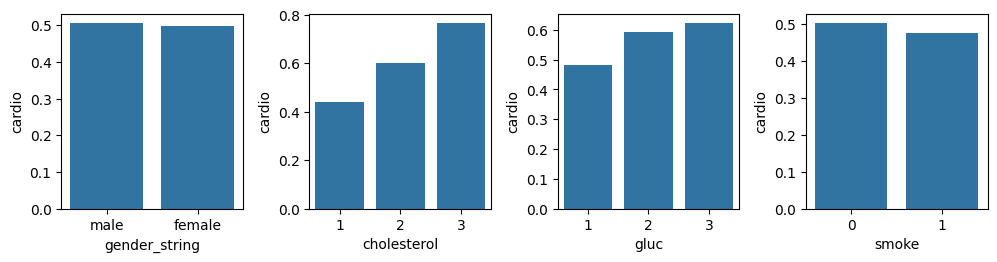

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

In [54]:
# Visualizing Discrete variables and its effects on cardio
raw_data['age_group'] = pd.cut(raw_data['age_years'], bins=[29, 30, 35, 40, 45, 50, 55, 60, 65], labels=['<30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '>60'])
variables = ('gender_string', 'cholesterol',	'gluc',	'smoke')
fig=plt.figure(figsize=(20,20))
j = 1
for i in variables:
  ax=fig.add_subplot(8,8,j)
  j = j + 1
  plt.figure(figsize=(2, 2))
  sns.barplot(x=i,y='cardio',data=raw_data,ci=None,ax=ax)
  fig.tight_layout()  
plt.show()

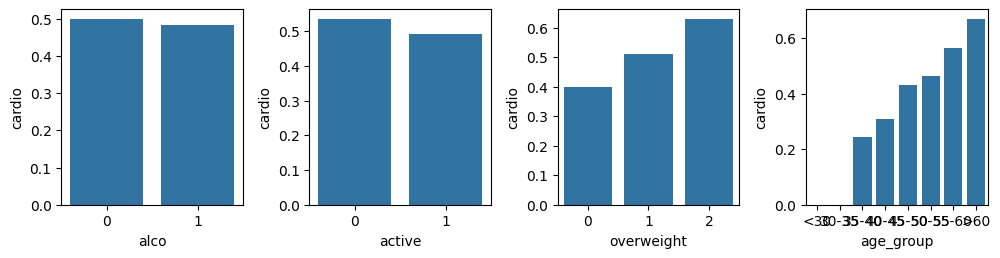

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

<Figure size 200x200 with 0 Axes>

In [55]:
variables2=('alco',	'active', 'overweight', 'age_group')
fig=plt.figure(figsize=(20,20))
j = 1
for i in variables2:
  ax=fig.add_subplot(8,8,j)
  j = j + 1
  plt.figure(figsize=(2, 2))
  sns.barplot(x=i,y='cardio',data=raw_data,ci=None,ax=ax)
  fig.tight_layout()  
plt.show()

Text(0, 0.5, 'Num personas')

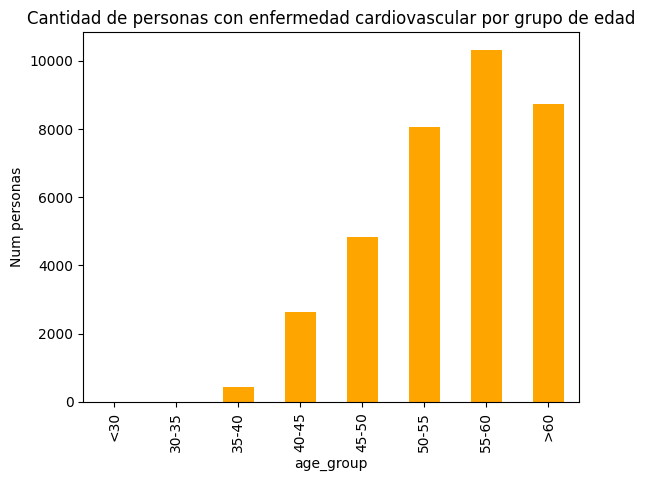

In [56]:
# Analisis de edades
raw_data['age_years'].min()#29.58
raw_data['age_years'].max()#64.97

# agrupar raw_data en 8 grupos de edades: <30, 30-35, 35-40, 40-45, 45-50, 50-55, 55-60, >60
raw_data['age_group'] = pd.cut(raw_data['age_years'], bins=[29, 30, 35, 40, 45, 50, 55, 60, 65], labels=['<30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '>60'])
#plot cantidad de personas en cada grupo con cardio=1
raw_data.groupby('age_group')['cardio'].sum() #hacer plot de esto
raw_data.groupby('age_group')['cardio'].sum().plot(kind='bar', color='orange') #titulo: cantidad de personas con enfermedad cardiovascular por grupo de edad
plt.title('Cantidad de personas con enfermedad cardiovascular por grupo de edad')
plt.ylabel('Num personas')

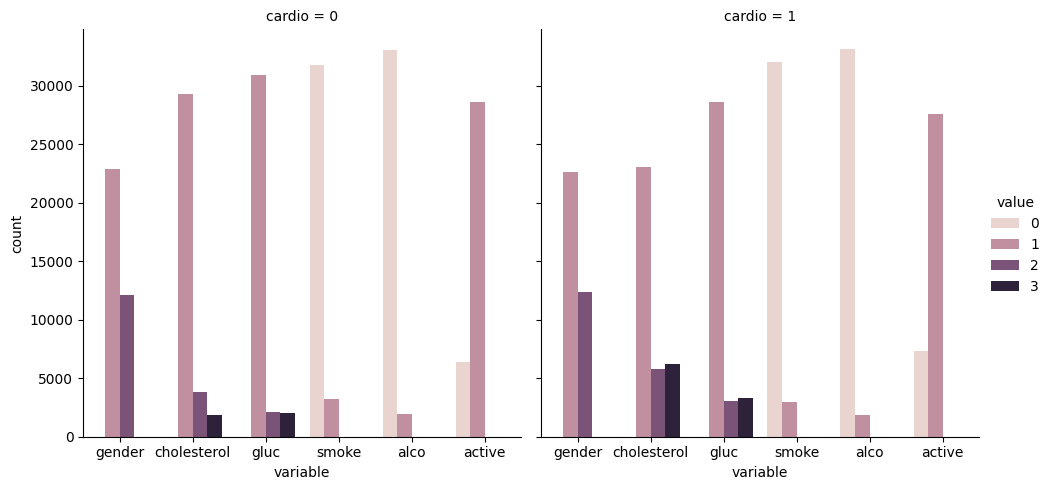

In [57]:
df_long = pd.melt(raw_data, id_vars=['cardio'], value_vars=['gender', 'cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count")

Text(0.5, 1.0, 'Correlation Map')

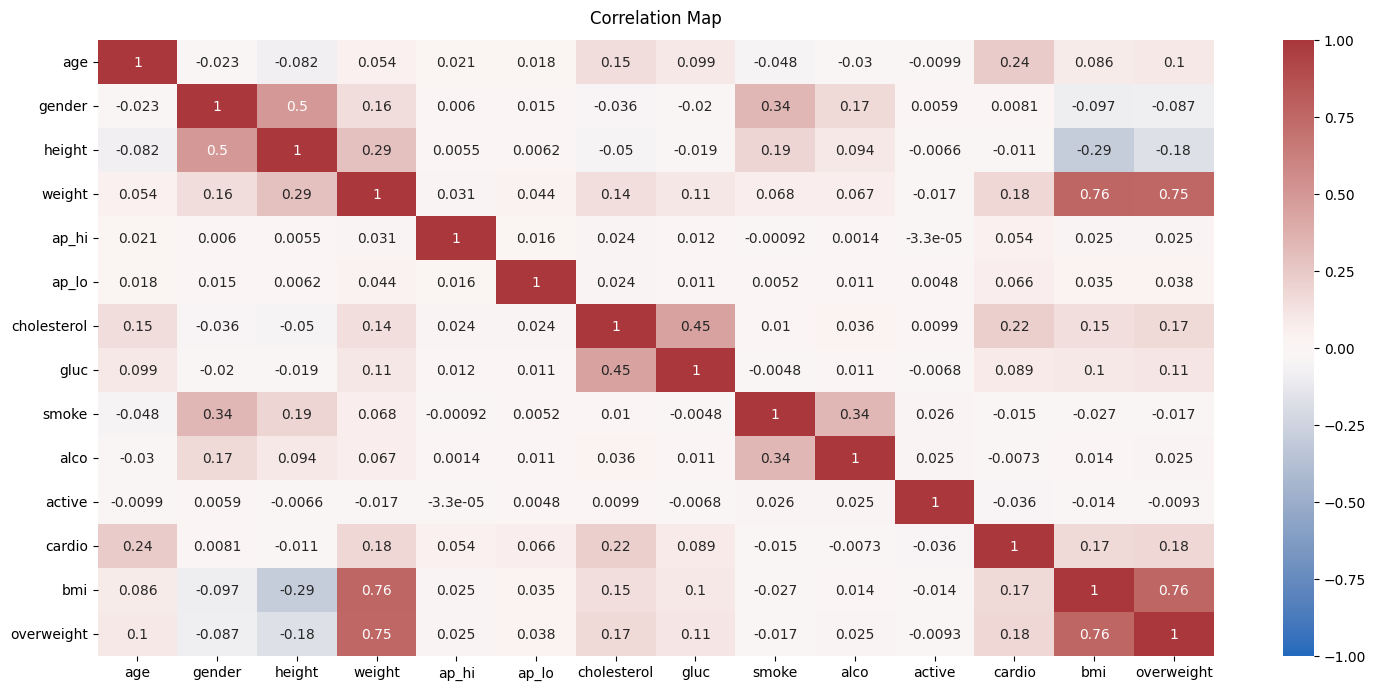

In [58]:
# Matriz de correlacion
# Correlation matrix to understand relation between variables

plt.figure(figsize=(18, 8))
data_without_age_gender = raw_data.drop(columns=['gender_string', 'age_group', 'age_years'])
sns.heatmap(data_without_age_gender.corr(), vmin=-1, vmax=1, annot=True, cmap='vlag') #raw_data sin age_gender

# cmap='BrBG'
plt.title('Correlation Map', fontdict={'fontsize':12}, pad=12)

## 1) Algoritmo Apriori

Vamos a tratar de encontrar los puestos mejor pagados del sector.
Para ello haremos uso del algoritmo Apriori usando TransactionEncoder

In [59]:
#buscar asociacion entre cardio=1 y overweight=2, active=1, smoke=1, alco=1, age_groups

Regla de asociación para personas como edad en cuartil mayor

In [60]:
threshold = raw_data['age'].quantile(0.75)
#raw_data['high_age'] = raw_data['age'] >= threshold
#quiero filas que tengas raw_data['gluc']==2
#quiero saber cuantas filas tienen: raw_data['gluc']==2, raw_data['age_group']=='>60' y raw_data['gender']==2
varon_glucalta_mayor=raw_data[(raw_data['gluc']==2) & (raw_data['age_group']=='>60') & (raw_data['gender']==2)].shape[0]
varon_glumed_mayor=raw_data[(raw_data['gluc']==1) & (raw_data['age_group']=='>60') & (raw_data['gender']==2)].shape[0]
varon_activo_mayor=raw_data[(raw_data['active']==1) & (raw_data['age_group']=='>60') & (raw_data['gender']==2)].shape[0]
varon_noactivo_mayor=raw_data[(raw_data['active']==0) & (raw_data['age_group']=='>60') & (raw_data['gender']==2)].shape[0]
print(f"Varones mayores de 60 años con glucosa alta: {varon_glucalta_mayor}")
print(f"Varones mayores de 60 años con glucosa media: {varon_glumed_mayor}")
print(f"Varones mayores de 60 años activos: {varon_activo_mayor}")
print(f"Varones mayores de 60 años no activos: {varon_noactivo_mayor}")


Varones mayores de 60 años con glucosa alta: 369
Varones mayores de 60 años con glucosa media: 3851
Varones mayores de 60 años activos: 3715
Varones mayores de 60 años no activos: 943


In [61]:
# Preparar los datos para Transaction Encoder
#data_list = raw_data.apply(lambda row: [row['Job Title'], 'High Salary'] if row['high_salary'] else [row['Job Title']], axis=1).tolist()

# Transaction Encoder
#te = TransactionEncoder()
#te_ary = te.fit(data_list).transform(data_list)
#df = pd.DataFrame(te_ary, columns=te.columns_)
#data para algoritmo a priori
raw_data_apriori=raw_data.copy()
raw_data_apriori['obese']=raw_data_apriori['overweight'].apply(lambda x: 1 if x == 2 else 0)
raw_data_apriori['overweight']=raw_data_apriori['overweight'].apply(lambda x: 1 if x == 1 else 0)

raw_data_apriori['glucose_high']=raw_data_apriori['gluc'].apply(lambda x: 1 if x == 2 else 0)
raw_data_apriori['glucose_med']=raw_data_apriori['gluc'].apply(lambda x: 1 if x == 1 else 0)

raw_data_apriori['cholesterol_high']=raw_data_apriori['cholesterol'].apply(lambda x: 1 if x == 2 else 0)
raw_data_apriori['cholesterol_med']=raw_data_apriori['cholesterol'].apply(lambda x: 1 if x == 1 else 0)

raw_data_apriori['male']=raw_data_apriori['gender'].apply(lambda x: 1 if x == 1 else 0) #1 si es hombre, 0 si es mujer
raw_data_apriori=raw_data_apriori.drop(columns=['gender', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'age_years', 'gluc', 'cholesterol', 'gender_string'])
raw_data_apriori.head()
raw_data_apriori = pd.get_dummies(raw_data_apriori, columns=['age_group'])
raw_data_apriori

smoke  alco  active  cardio  overweight  obese  glucose_high  \
id                                                                    
0          0     0       1       0           0      0             0   
1          0     0       1       1           0      1             0   
2          0     0       0       1           0      0             0   
3          0     0       1       1           1      0             0   
4          0     0       0       0           0      0             0   
...      ...   ...     ...     ...         ...    ...           ...   
99993      1     0       1       0           1      0             0   
99995      0     0       1       1           0      1             1   
99996      0     1       0       1           0      1             0   
99998      0     0       0       1           1      0             1   
99999      0     0       1       0           0      0             0   

       glucose_med  cholesterol_high  cholesterol_med  male  age_group_<30  \
id                                                                           
0                1                 0                1     0          False   
1                1                 0                0     1          False   
2                1                 0                0     1          False   
3                1                 0                1     0          False   
4                1                 0                1     1          False   
...            ...               ...              ...   ...            ...   
99993            1                 0                1     0          False   
99995            0                 1                0     1          False   
99996            1                 0                0     0          False   
99998            0                 0                1     1          False   
99999            1                 1                0     1          False   

       age_group_30-35  age_group_35-40  age_group_40-45  age_group_45-50  \
id                                                                          
0                False            False            False            False   
1                False            False            False            False   
2                False            False            False            False   
3                False            False            False             True   
4                False            False            False             True   
...                ...              ...              ...              ...   
99993            False            False            False            False   
99995            False            False            False            False   
99996            False            False            False            False   
99998            False            False            False            False   
99999            False            False            False            False   

       age_group_50-55  age_group_55-60  age_group_>60  
id                                                      
0                 True            False          False  
1                False             True          False  
2                 True            False          False  
3                False            False          False  
4                False            False          False  
...                ...              ...            ...  
99993             True            False          False  
99995            False            False           True  
99996             True            False          False  
99998            False            False           True  
99999            False             True          False  

[70000 rows x 19 columns]

In [62]:
# Aplicar Apriori
#transformar datos
#algoritmo a priori con minimo sporte de 5%
res_apriori = apriori(raw_data_apriori, min_support=0.05, use_colnames=True, verbose=1)
# Generar reglas de asociación
rules = association_rules(res_apriori, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head(30))

Processing 360 combinations | Sampling itemset size 65
                                            antecedents    consequents  \
317                  (cholesterol_med, age_group_40-45)  (glucose_med)   
564          (cholesterol_med, active, age_group_40-45)  (glucose_med)   
853            (cholesterol_med, male, age_group_40-45)  (glucose_med)   
1194   (age_group_50-55, active, cholesterol_med, male)  (glucose_med)   
876            (age_group_50-55, cholesterol_med, male)  (glucose_med)   
1168   (age_group_45-50, active, cholesterol_med, male)  (glucose_med)   
1102  (age_group_50-55, overweight, cholesterol_med,...  (glucose_med)   
864            (age_group_45-50, cholesterol_med, male)  (glucose_med)   
590          (age_group_50-55, cholesterol_med, active)  (glucose_med)   
808      (age_group_50-55, overweight, cholesterol_med)  (glucose_med)   
328                  (age_group_50-55, cholesterol_med)  (glucose_med)   
576          (age_group_45-50, cholesterol_med, active)  

In [63]:
#filtrar donde consecuencia sea cardio=1

rules_with_cardio = rules[rules['consequents'].apply(lambda x: len(x) == 1 and 'cardio' in x)]
rules_with_cardio.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
250,"(male, age_group_>60)",(cardio),0.119271,0.4997,0.081400,0.682477,1.365773,0.021800,1.575634,0.304082
466,"(male, active, age_group_>60)",(cardio),0.094843,0.4997,0.064029,0.675102,1.351014,0.016636,1.539866,0.287039
781,"(male, age_group_>60, glucose_med)",(cardio),0.095300,0.4997,0.064100,0.672613,1.346033,0.016479,1.528160,0.284156
21,(age_group_>60),(cardio),0.185814,0.4997,0.124514,0.670101,1.341006,0.031663,1.516523,0.312326
1064,"(active, glucose_med, male, age_group_>60)",(cardio),0.076100,0.4997,0.050771,0.667167,1.335136,0.012744,1.503157,0.271688


In [64]:
##ahora sin tener en cuenta la edad
raw_data_apriori=raw_data.copy()
raw_data_apriori['obese']=raw_data_apriori['overweight'].apply(lambda x: 1 if x == 2 else 0)
raw_data_apriori['overweight']=raw_data_apriori['overweight'].apply(lambda x: 1 if x == 1 else 0)

raw_data_apriori['glucose_high']=raw_data_apriori['gluc'].apply(lambda x: 1 if x == 2 else 0)
raw_data_apriori['glucose_med']=raw_data_apriori['gluc'].apply(lambda x: 1 if x == 1 else 0)

raw_data_apriori['cholesterol_high']=raw_data_apriori['cholesterol'].apply(lambda x: 1 if x == 2 else 0)
raw_data_apriori['cholesterol_med']=raw_data_apriori['cholesterol'].apply(lambda x: 1 if x == 1 else 0)

raw_data_apriori['male']=raw_data_apriori['gender'].apply(lambda x: 1 if x == 1 else 0) #1 si es hombre, 0 si es mujer
raw_data_apriori=raw_data_apriori.drop(columns=['gender', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi', 'age_years', 'gluc', 'cholesterol', 'gender_string', 'age_group'])
raw_data_apriori.head()
res_apriori = apriori(raw_data_apriori, min_support=0.05, use_colnames=True, verbose=1)
# Generar reglas de asociación
rules = association_rules(res_apriori, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head(30))
#filtrar donde consecuencia sea cardio=1

rules_with_cardio = rules[rules['consequents'].apply(lambda x: len(x) == 1 and 'cardio' in x)]
rules_with_cardio.head()

Processing 12 combinations | Sampling itemset size 64
                                           antecedents    consequents  \
268                (overweight, cholesterol_med, male)  (glucose_med)   
376        (overweight, active, cholesterol_med, male)  (glucose_med)   
124                            (cholesterol_med, male)  (glucose_med)   
214                    (active, cholesterol_med, male)  (glucose_med)   
64                           (cholesterol_med, active)  (glucose_med)   
172              (overweight, cholesterol_med, active)  (glucose_med)   
20                                   (cholesterol_med)  (glucose_med)   
104                      (overweight, cholesterol_med)  (glucose_med)   
414        (overweight, cardio, cholesterol_med, male)  (glucose_med)   
444  (overweight, cardio, male, active, cholesterol...  (glucose_med)   
222              (overweight, cardio, cholesterol_med)  (glucose_med)   
286      (overweight, cardio, cholesterol_med, active)  (glucose_med) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(obese),(cardio),0.076671,0.4997,0.055629,0.725545,1.451961,0.017316,1.822885,0.337124
122,"(high_age, male)",(cardio),0.162986,0.4997,0.107871,0.661846,1.324487,0.026427,1.479503,0.292696
97,"(overweight, high_age)",(cardio),0.090743,0.4997,0.059657,0.657431,1.315651,0.014313,1.460435,0.263864
78,"(obese, glucose_med)",(cardio),0.129971,0.4997,0.084971,0.653770,1.308325,0.020025,1.444993,0.270869
157,"(obese, male, active)",(cardio),0.250071,0.4997,0.162900,0.651414,1.303610,0.037939,1.435226,0.310562


La mayor asociación para enfermedadees cardiovasculares es tener obseidad. Sorprende que haya asociaciación con la actividad, pero esto se puede deber a que independientemente de que la persona sea activa o no, si es obesa es propensa a tener esta enfermedad.Parece que la actividad es un factor poco determinante a la hora de reducir las probabilidades de sufrir enfermedades cardio. 

## 2) Árbol de decisión mediante CART

In [39]:
data_train = raw_data.drop(columns=['gender_string', 'age_group'])
data_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years,overweight,high_age
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50.39,0,False
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.42,2,False
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,51.66,0,False
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.28,1,False
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,47.87,0,False


In [40]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
                                        data_train.drop(columns = "cardio"),
                                        data_train['cardio'],
                                        train_size= 0.75, # by default 0.75 is the amunt of data for training
                                        random_state = 123
                                                            )     
 

In [23]:
X_train.info()
labels=X_train.columns

<class 'pandas.core.frame.DataFrame'>
Index: 52500 entries, 46257 to 22463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          52500 non-null  int64  
 1   gender       52500 non-null  int64  
 2   height       52500 non-null  int64  
 3   weight       52500 non-null  float64
 4   ap_hi        52500 non-null  int64  
 5   ap_lo        52500 non-null  int64  
 6   cholesterol  52500 non-null  int64  
 7   gluc         52500 non-null  int64  
 8   smoke        52500 non-null  int64  
 9   alco         52500 non-null  int64  
 10  active       52500 non-null  int64  
 11  bmi          52500 non-null  float64
 12  age_years    52500 non-null  float64
 13  overweight   52500 non-null  int64  
 14  high_age     52500 non-null  bool   
dtypes: bool(1), float64(3), int64(11)
memory usage: 6.1 MB


In [24]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17500 entries, 31382 to 58043
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          17500 non-null  int64  
 1   gender       17500 non-null  int64  
 2   height       17500 non-null  int64  
 3   weight       17500 non-null  float64
 4   ap_hi        17500 non-null  int64  
 5   ap_lo        17500 non-null  int64  
 6   cholesterol  17500 non-null  int64  
 7   gluc         17500 non-null  int64  
 8   smoke        17500 non-null  int64  
 9   alco         17500 non-null  int64  
 10  active       17500 non-null  int64  
 11  bmi          17500 non-null  float64
 12  age_years    17500 non-null  float64
 13  overweight   17500 non-null  int64  
 14  high_age     17500 non-null  bool   
dtypes: bool(1), float64(3), int64(11)
memory usage: 2.0 MB


In [25]:
# count of each category value and checking categories in training and in test

train_count= y_train.value_counts()
print("Training :\n", train_count)

test_count=y_test.value_counts()
print("\n Test :\n", test_count)


rows_train = len(X_train.axes[0]) 

rows_test = len(X_test.axes[0])

print("\n Porcentaje de casos de cada clase en training", 
      round(train_count[0]/rows_train,2), round(train_count[1]/rows_train,2))
print("\n Porcentaje de casos de cada clase en test  ", round(test_count[0]/rows_test,2), round(test_count[1]/rows_test,2))

Training :
 cardio
1    26278
0    26222
Name: count, dtype: int64

 Test :
 cardio
0    8799
1    8701
Name: count, dtype: int64

 Porcentaje de casos de cada clase en training 0.5 0.5

 Porcentaje de casos de cada clase en test   0.5 0.5


In [26]:
# Creating the model with decision tree
# ------------------------------------------------------------------------------
model = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Tree Depth: 5
Number of leaves or terminal nodes: 32


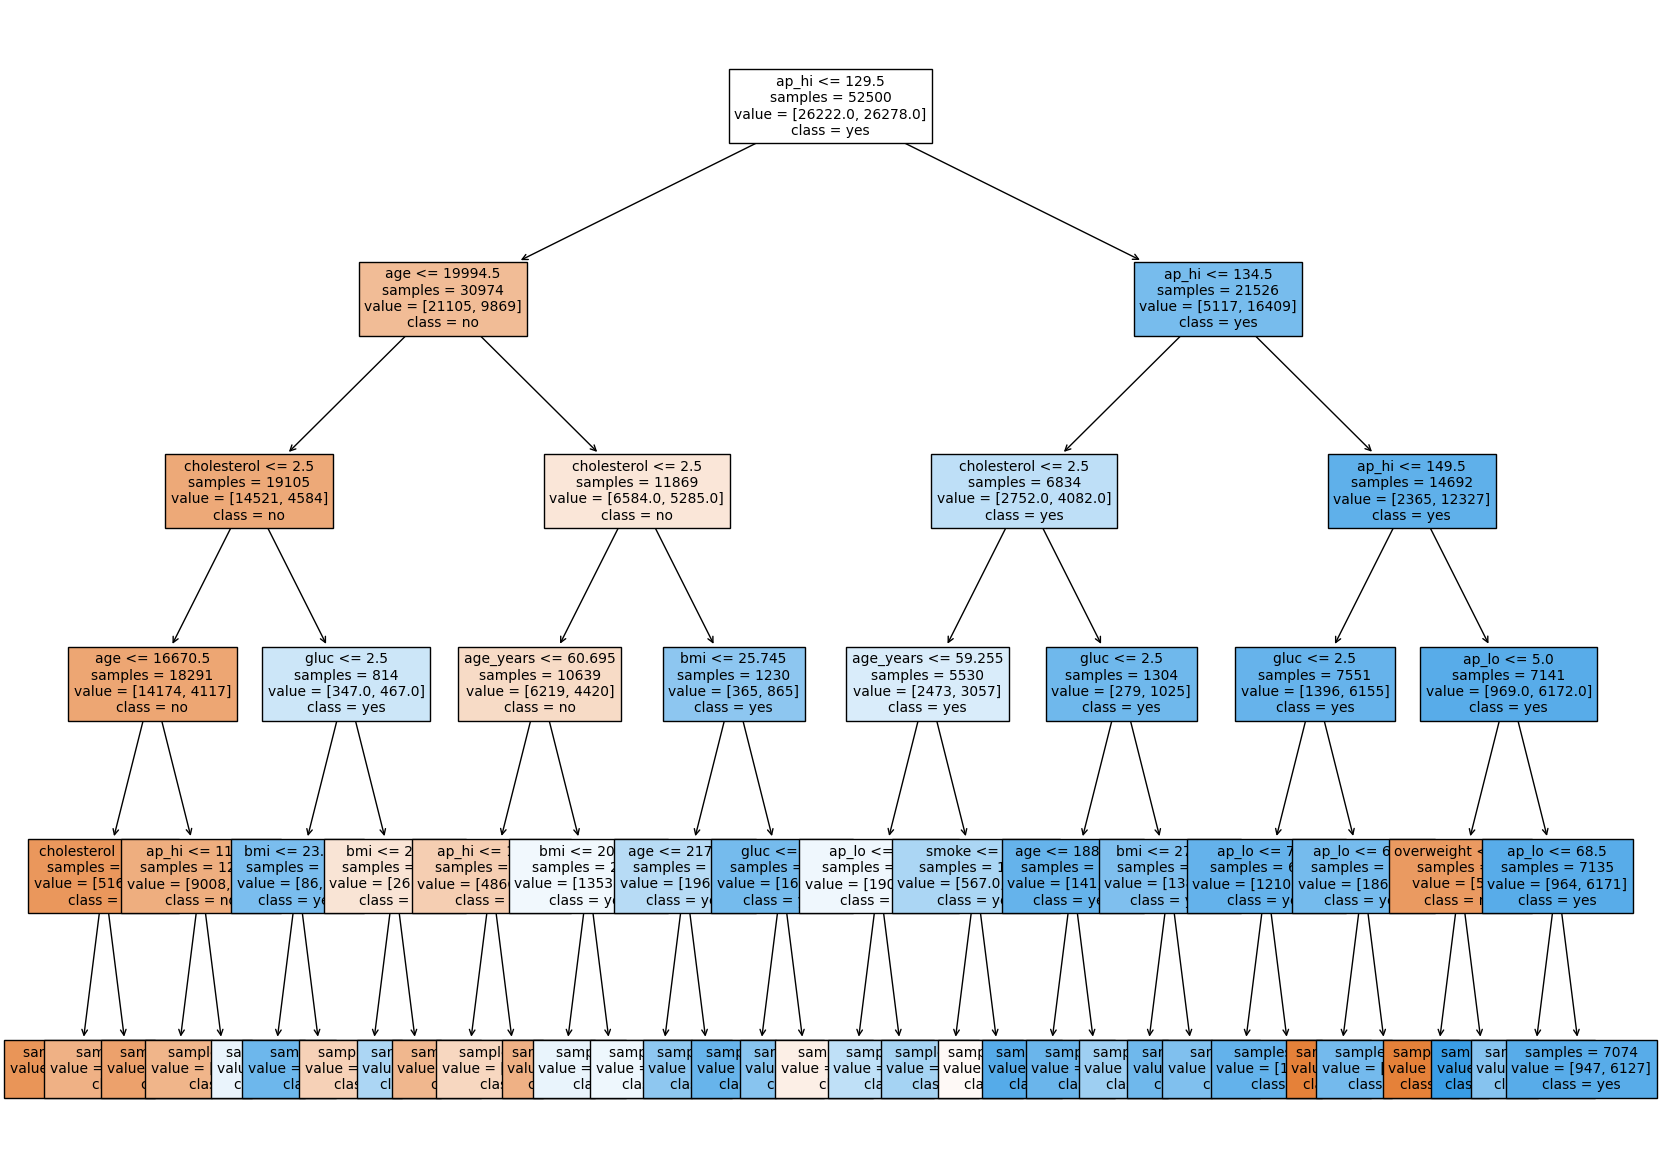

In [27]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree Depth: {model.get_depth()}")
print(f"Number of leaves or terminal nodes: {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = labels.tolist(),
            class_names   = ['no', 'yes'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            ax            = ax
       )

In [28]:
# get the text representation
from sklearn import tree
#text_representation = tree.export_text(model)  # generic features

text_representation = tree.export_text(model, feature_names= list(X_train.columns.values) )



print(text_representation)

|--- ap_hi <= 129.50
|   |--- age <= 19994.50
|   |   |--- cholesterol <= 2.50
|   |   |   |--- age <= 16670.50
|   |   |   |   |--- cholesterol <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- cholesterol >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  16670.50
|   |   |   |   |--- ap_hi <= 119.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ap_hi >  119.50
|   |   |   |   |   |--- class: 0
|   |   |--- cholesterol >  2.50
|   |   |   |--- gluc <= 2.50
|   |   |   |   |--- bmi <= 23.09
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- bmi >  23.09
|   |   |   |   |   |--- class: 1
|   |   |   |--- gluc >  2.50
|   |   |   |   |--- bmi <= 29.32
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  29.32
|   |   |   |   |   |--- class: 1
|   |--- age >  19994.50
|   |   |--- cholesterol <= 2.50
|   |   |   |--- age_years <= 60.69
|   |   |   |   |--- ap_hi <= 118.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ap_hi >  118

In [29]:
# Model training error
#-------------------------------------------------------------------------------
predictions_train = model.predict(X = X_train,)

print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train,
    y_pred    = predictions_train
)

Confussion Matrix -- TRAIN
-------------------


array([[20650,  5572],
       [ 8391, 17887]], dtype=int64)

In [30]:
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))


 Accuracy in train 1s: 73.40 %


In [31]:
# Model test error
#-------------------------------------------------------------------------------
predictions_test = model.predict(X = X_test,)

print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[6877, 1922],
       [2768, 5933]], dtype=int64)

In [32]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))


 Accuracy in test 1s: 73.20 %


El modelo actual tiene una profundida máxima de 5
Hay que estudiarlo con más profundida para encontrar su profundidad máxima y el alpha por donde podar el árbol

In [33]:
# Analyzing Pruning
#-------------------------


#SEVERAL METHODS ARE PROPOSED BELOW

In [34]:
# Common-sense selection of alpha based on cost-complexity values

#Obtaining diferent options of alpha values

path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

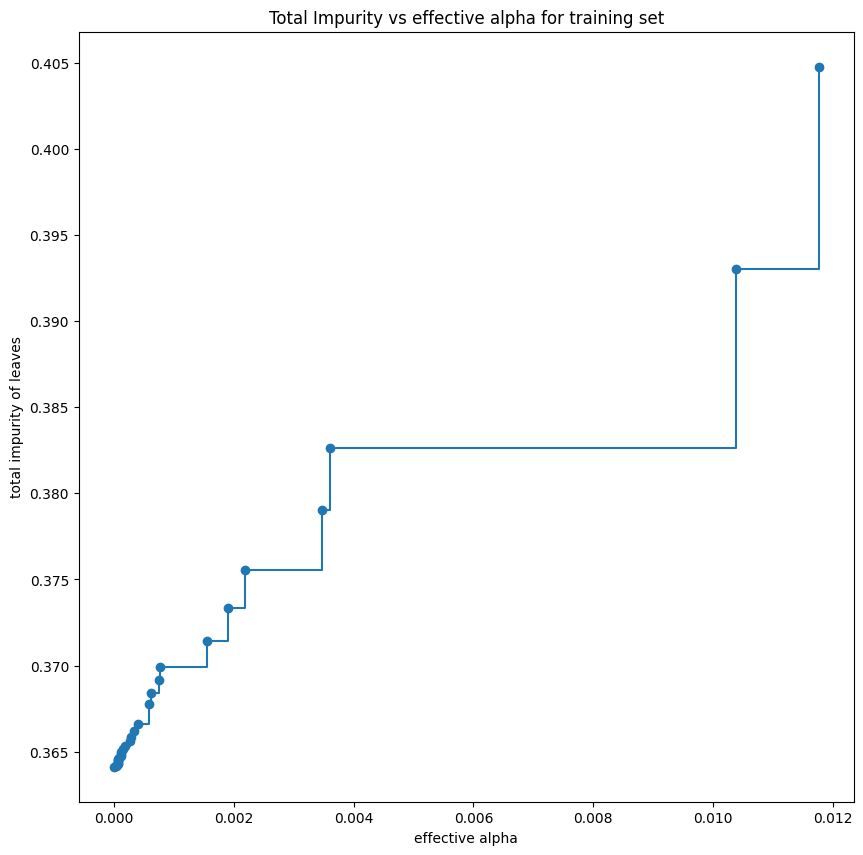

In [35]:
# Representation Impurity vs effective alpha for training set

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [36]:
# Different alpha options are tried
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.09523204996401502


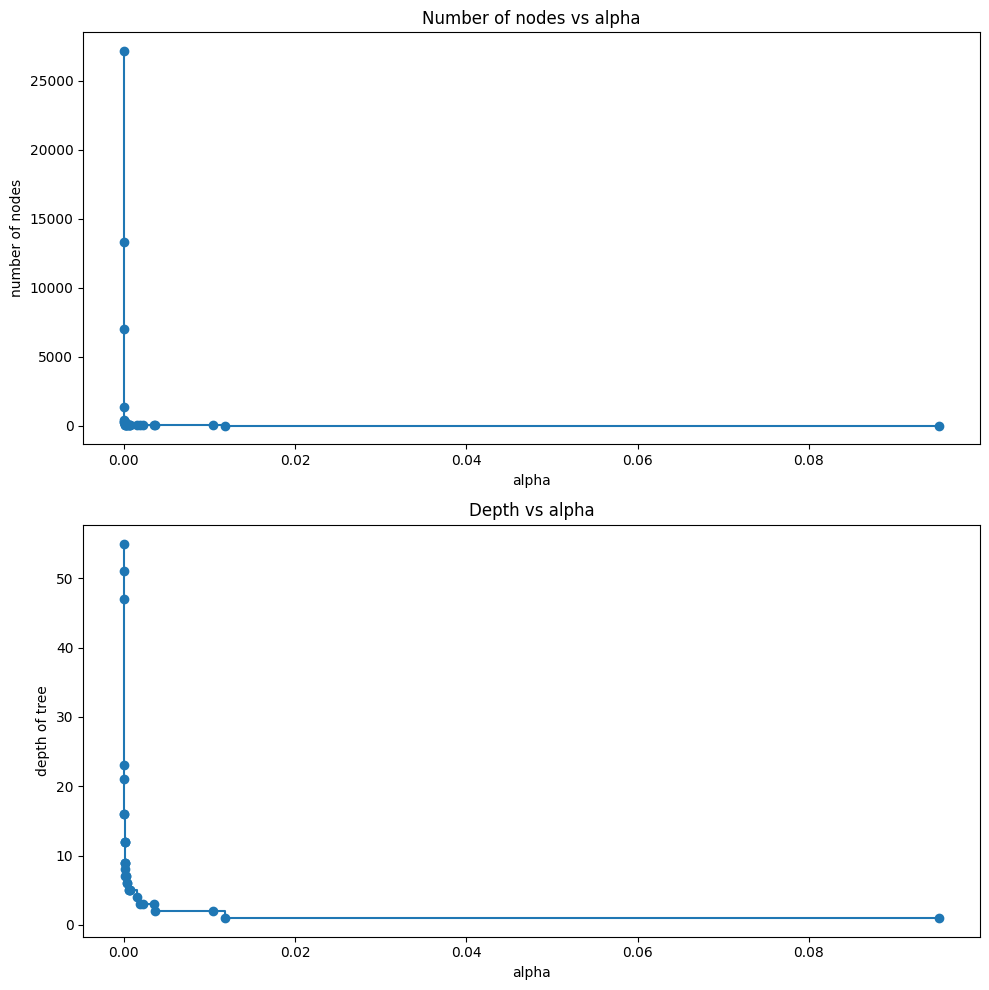

In [37]:
# we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node
# This is not classification

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots( 2, 1, figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

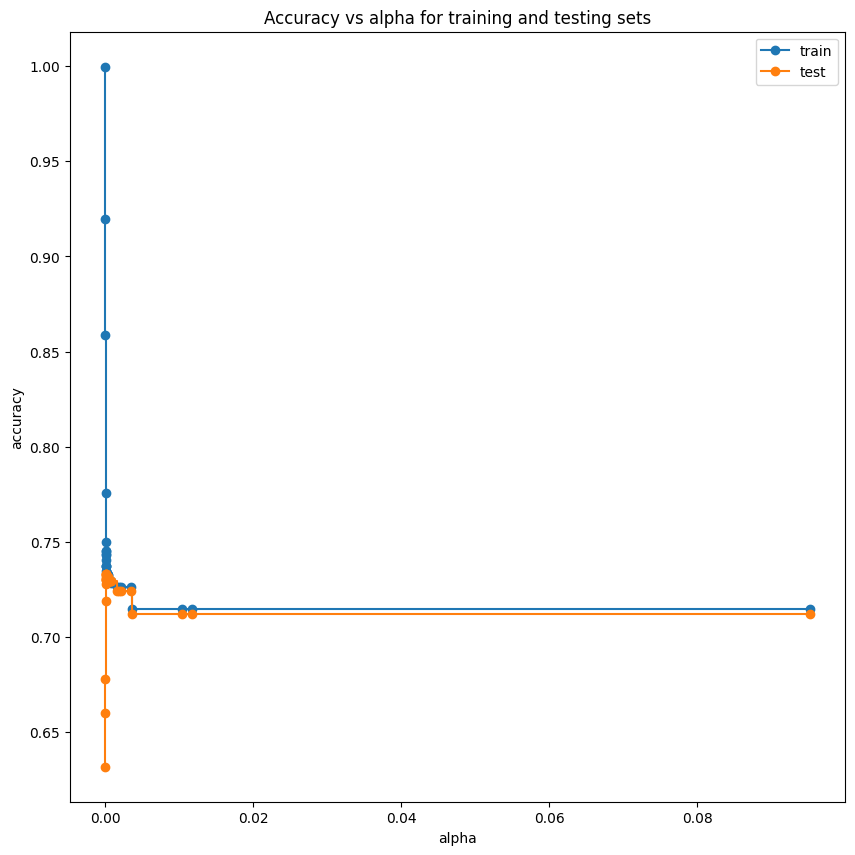

In [38]:
# Cheking scores in training and test datasets for different alphas

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [39]:
# the scores obtained are now printed and ordered by the best test score

eva_df = pd.DataFrame({'ccp_alphas': ccp_alphas, 'train_scores': train_scores, 'test_scores': test_scores})
eva_df = eva_df.sort_values(['test_scores'], ascending = False)
eva_df.head(10)

,ccp_alphas,train_scores,test_scores
12,0.000120,0.737010,0.732971
11,0.000111,0.737010,0.732971
13,0.000154,0.734457,0.732743
10,0.000110,0.737143,0.732571
14,0.000176,0.733600,0.731543
15,0.000272,0.733600,0.731543
16,0.000276,0.732590,0.731200
17,0.000338,0.732324,0.731200
18,0.000407,0.732324,0.731200
9,0.000081,0.740171,0.731143


In [40]:
# Obtaining the best alpha from the previous list
best_alpha= eva_df.iloc[0][0]

best_alpha

0.00012011956529539699

In [41]:
# fit the pruned tree with best alpha
import pydotplus
from dmba import plotDecisionTree, classificationSummary, regressionSummary

prunedtree_I = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0)

prunedtree_I.fit(X_train, y_train)


classificationSummary(y_train, prunedtree_I.predict(X_train))
classificationSummary(y_test, prunedtree_I.predict(X_test))

Confusion Matrix (Accuracy 0.7370)

       Prediction
Actual     0     1
     0 20937  5285
     1  8522 17756
Confusion Matrix (Accuracy 0.7330)

       Prediction
Actual    0    1
     0 6945 1854
     1 2819 5882


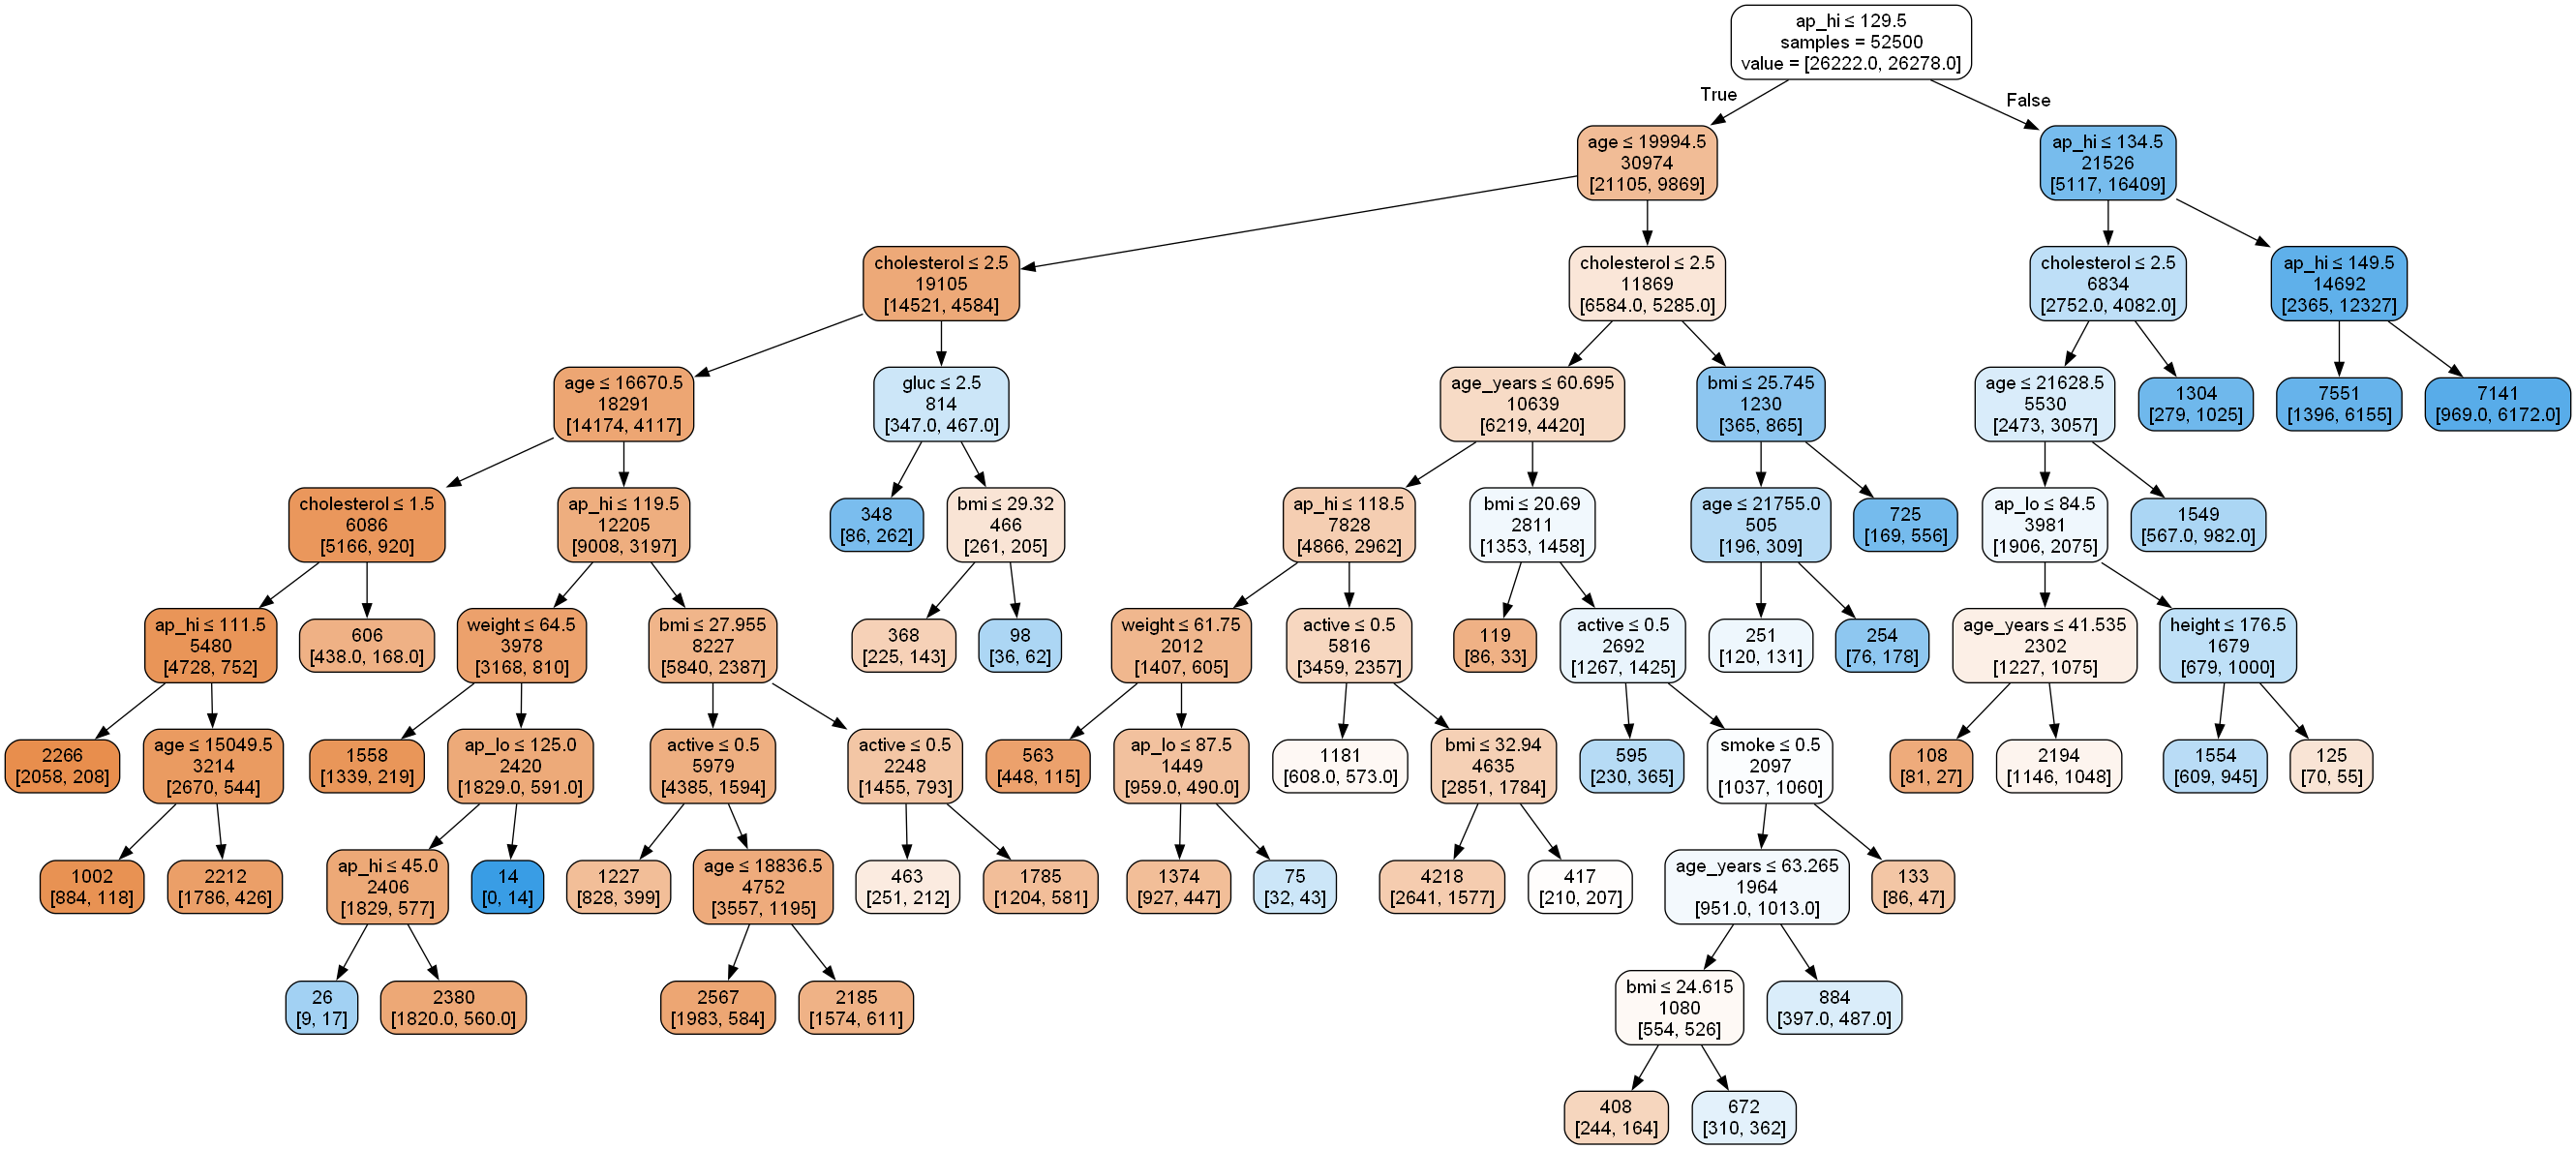

In [42]:
plotDecisionTree(prunedtree_I, feature_names=X_train.columns)

Tree Depth: 9
Number of leaves or terminal nodes: 39


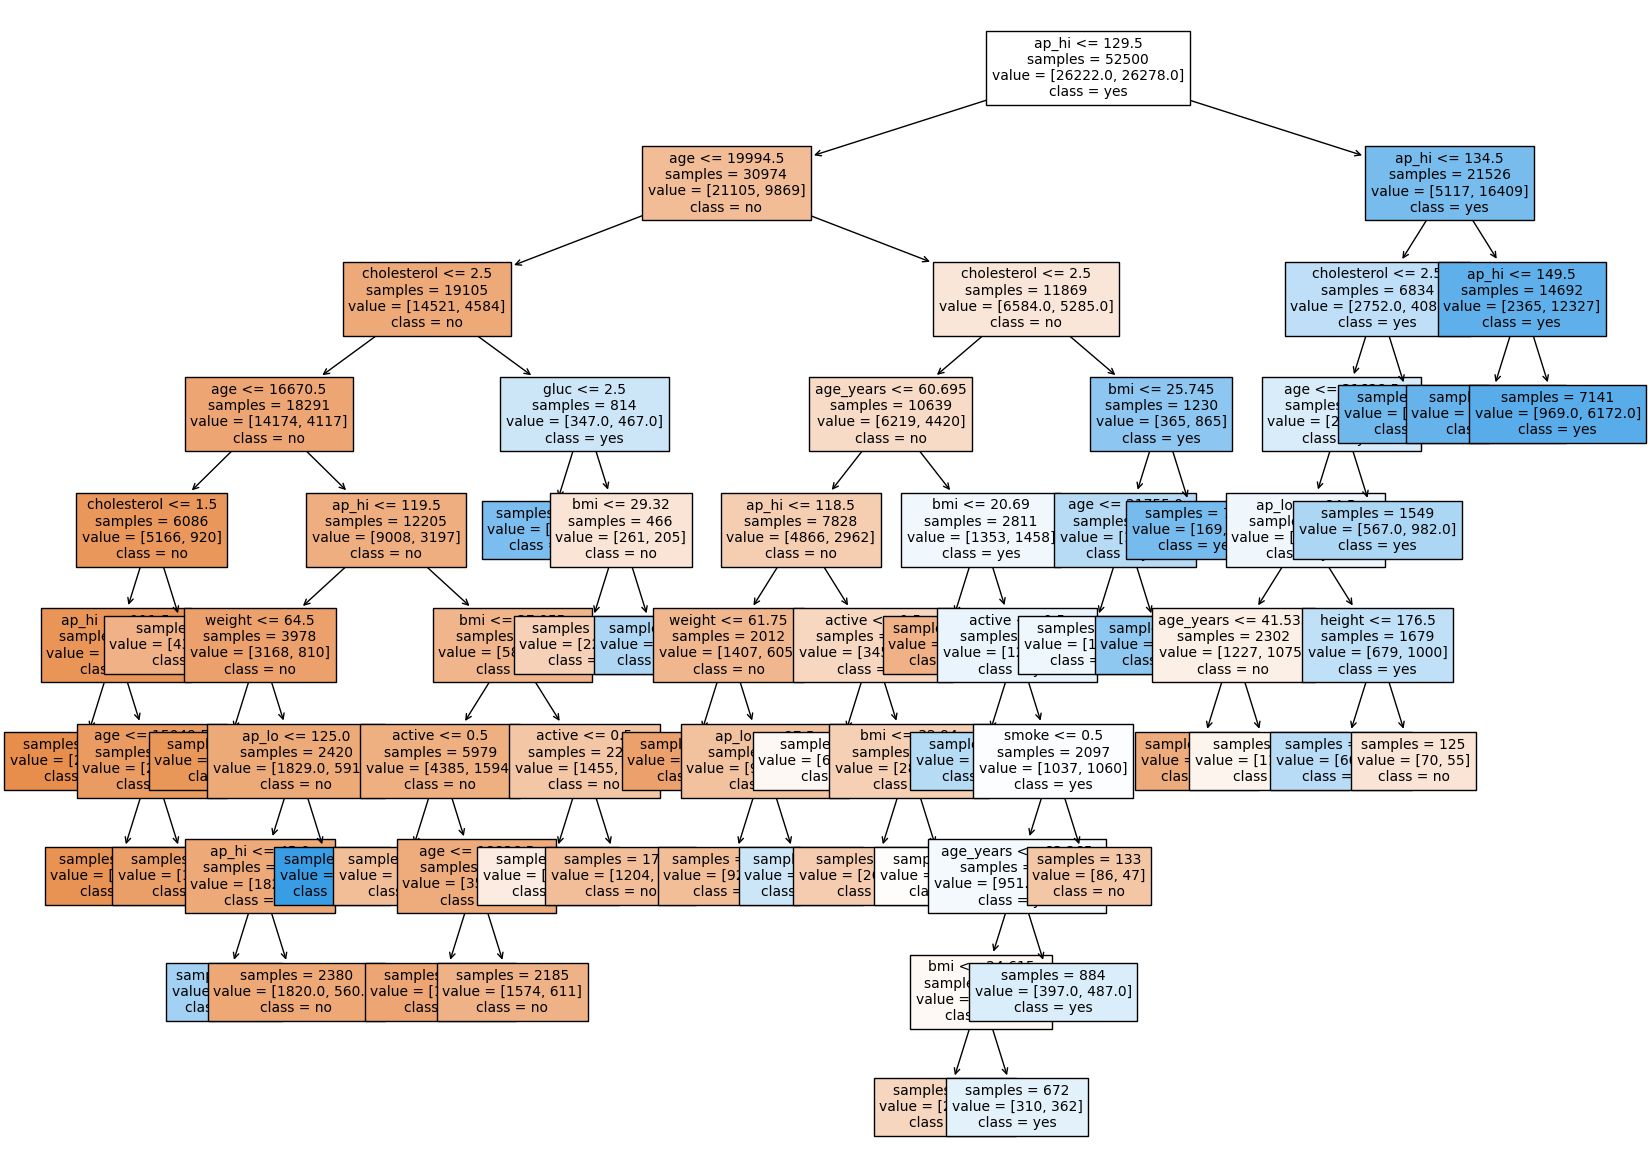

In [43]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree Depth: {prunedtree_I.get_depth()}")
print(f"Number of leaves or terminal nodes: {prunedtree_I.get_n_leaves()}")

plot = plot_tree(
            decision_tree = prunedtree_I,
            feature_names = labels.tolist(),
            class_names   = ['no', 'yes'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            ax            = ax
       )

El árbol creado tiene las siguientes características:
Profundidad =9; alpha=0.00012; accuracy=0.7370. El alpha tan bajo implica que en este caso lo óptimo es que haya poca penalización a una mayor complejidad.

## 2) Árbol de decisión con ensembles

### 2.1) Random Forest

Optimum value of max_features: 4


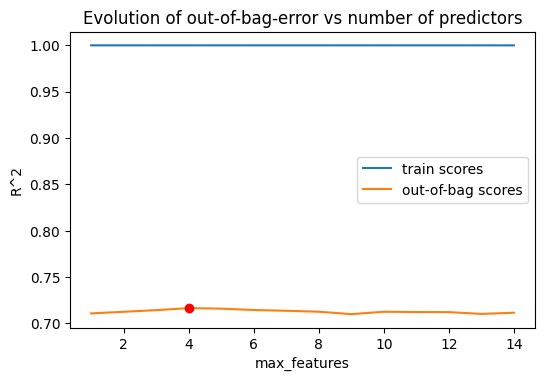

In [44]:
# Defining number of features to use based on Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Values to test for number of features
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Loop for training a model for each value in max_features. It is obtained training error
# and Out-of-Bag.
for max_features in max_features_range:
    model = RandomForestClassifier(
                n_estimators = 100,
                criterion    = 'entropy',  # or 'gini'
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    oob_scores.append(model.oob_score_)
    
# Graphic with the evolution of errors
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolution of out-of-bag-error vs number of predictors")
plt.legend()
print(f"Optimum value of max_features: {max_features_range[np.argmax(oob_scores)]}")

Optimum value of number of trees: 136


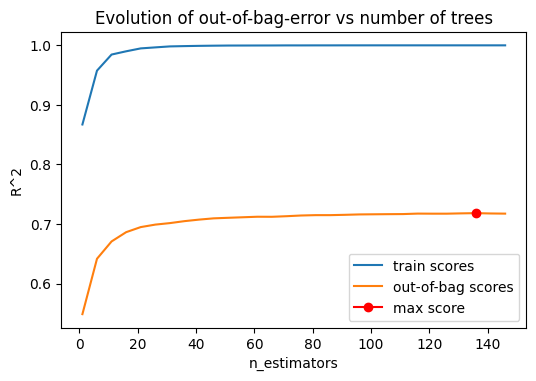

In [45]:
# Once  the number of estimators is know, the number of trees is found using Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for n_estimators in estimator_range:
    model1 = RandomForestClassifier(
                n_estimators = n_estimators,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 4,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    model1.fit(X_train, y_train)
    train_scores.append(model1.score(X_train, y_train))
    oob_scores.append(model1.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolution of out-of-bag-error vs number of trees")
plt.legend()
print(f"Optimum value of number of trees: {estimator_range[np.argmax(oob_scores)]}")

Optimum value of minimum number of observations in leaves : 46


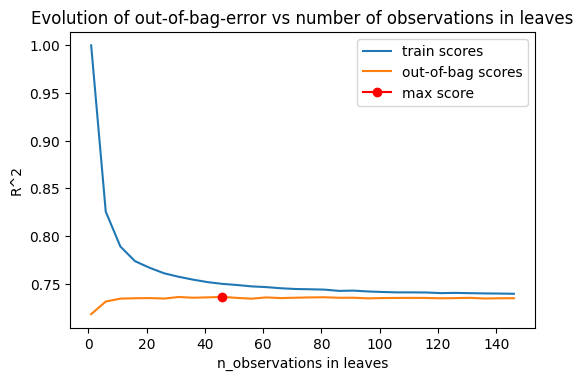

In [46]:
# Fitting the minimum number of observations in the leeaves of the trees using Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
obser_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for observ in obser_range:
    model1 = RandomForestClassifier(
                n_estimators = 136,
                criterion    = 'entropy',
                max_depth    = None,
                max_features = 4,
                min_samples_leaf = observ,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    model1.fit(X_train, y_train)
    train_scores.append(model1.score(X_train, y_train))
    oob_scores.append(model1.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(obser_range, train_scores, label="train scores")
ax.plot(obser_range, oob_scores, label="out-of-bag scores")
ax.plot(obser_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_observations in leaves")
ax.set_title("Evolution of out-of-bag-error vs number of observations in leaves")
plt.legend();
print(f"Optimum value of minimum number of observations in leaves : {obser_range[np.argmax(oob_scores)]}")

In [47]:
# Model creation
# ==============================================================================
rf_final = RandomForestClassifier(
            n_estimators = 136,  # number of trees
            criterion    = 'entropy',
            max_depth    = None,
            #max_features = 'auto',
            max_features = 4,
            min_samples_leaf = 46,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
rf_final.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=4, min_samples_leaf=46,
                       n_estimators=136, n_jobs=-1, oob_score=True,
                       random_state=123)

In [48]:
# Model training error
#-------------------------------------------------------------------------------
predictions_train = rf_final.predict(X = X_train,)

print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train,
    y_pred    = predictions_train
)

Confussion Matrix -- TRAIN
-------------------


array([[20713,  5509],
       [ 7622, 18656]], dtype=int64)

In [49]:
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))


 Accuracy in train 1s: 74.99 %


In [50]:
# Model test error
#-------------------------------------------------------------------------------
predictions_test = rf_final.predict(X = X_test,)
print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[6801, 1998],
       [2600, 6101]], dtype=int64)

In [51]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))


 Accuracy in test 1s: 73.73 %


Accuracy del Random Forest es ligeramente superior al árbol CART - pasa de un 73.70% a un 73.73%. Aun así hay que seguir buscando el mejor modelo (más adelante)

In [52]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importance': rf_final.feature_importances_}
                            )
print("Importance  of the model predictors")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending=False)

Importance  of the model predictors
-------------------------------------------


,predictor,importance
4,ap_hi,0.429978
5,ap_lo,0.179905
0,age,0.096334
12,age_years,0.086402
6,cholesterol,0.074206
11,bmi,0.049877
3,weight,0.032316
2,height,0.021041
13,overweight,0.009258
10,active,0.007062


In [53]:
# Grid to find hiperparameters
# ==============================================================================


from sklearn.model_selection import ParameterGrid

param_grid = ParameterGrid(
                {'n_estimators': [50, 100, 150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
results = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    model = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    model.fit(X_train, y_train)
    
    results['params'].append(params)
    results['oob_accuracy'].append(model.oob_score_)
    print(f"Model: {params} \u2713")

# Results
# ==============================================================================
results = pd.DataFrame(results)
results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
results = results.sort_values('oob_accuracy', ascending=False)
results = results.drop(columns = 'params')
results.head(10)

Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 50} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 100} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 50} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 100} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 50} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 100} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Model: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 50} ✓
Model: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 100} ✓
Model: {'criterion':

,oob_accuracy,criterion,max_depth,max_features,n_estimators
20,0.736267,gini,10.0,5,150
59,0.735867,entropy,10.0,7,150
56,0.735829,entropy,10.0,5,150
26,0.735790,gini,10.0,9,150
19,0.735790,gini,10.0,5,100
62,0.735771,entropy,10.0,9,150
55,0.735752,entropy,10.0,5,100
25,0.735714,gini,10.0,9,100
58,0.735543,entropy,10.0,7,100
61,0.735410,entropy,10.0,9,100


In [54]:
# Better hyperparameters using out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Better hyperparameters found (oob-accuracy)")
print("--------------------------------------------------")
print(results.iloc[0,0], ":", results.iloc[0,:]['oob_accuracy'], "accuracy")

--------------------------------------------------
Better hyperparameters found (oob-accuracy)
--------------------------------------------------
0.7362666666666666 : 0.7362666666666666 accuracy


In [55]:
# Grid search based on cross-validation
# ==============================================================================
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [20, 25, 50, 100],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# grid search by CV
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
results_cv = pd.DataFrame(grid.cv_results_)
results_cv.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
26,gini,10,5,50,0.735530,0.004194,0.765381,0.001213
27,gini,10,5,100,0.735505,0.004481,0.765559,0.000993
75,entropy,10,5,100,0.735454,0.004350,0.761332,0.000915
74,entropy,10,5,50,0.734889,0.004215,0.761083,0.001185


In [56]:
# Better hyperparameters using cv and out-of-bag error
# ==============================================================================
print("----------------------------------------")
print("Better hyperparameters found (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Better hyperparameters found (cv)
----------------------------------------
{'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 50} : 0.7355301587301587 accuracy


In [57]:
model_final = grid.best_estimator_

In [58]:
# Model training error
#-------------------------------------------------------------------------------
predictions_train = model_final.predict(X = X_train,)

print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train,
    y_pred    = predictions_train
)

Confussion Matrix -- TRAIN
-------------------


array([[21240,  4982],
       [ 7511, 18767]], dtype=int64)

In [59]:
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))


 Accuracy in train 1s: 76.20 %


In [60]:
# Model test error
#-------------------------------------------------------------------------------
predictions_test = model_final.predict(X = X_test,)

print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[6827, 1972],
       [2670, 6031]], dtype=int64)

In [61]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))


 Accuracy in test 1s: 73.47 %


In [62]:
mat_conf = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predictions_test
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )

print("Confissio Matrix")
print("-------------------")
print(mat_conf)
print("")
print(f"Accuracy in test is: {100 * accuracy} %")

Confissio Matrix
-------------------
[[6827 1972]
 [2670 6031]]

Accuracy in test is: 73.47428571428571 %


### 2.1) Boosting

In [64]:
# Grid to find hiperparameters
# ==============================================================================
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedKFold
import multiprocessing


# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [25, 50, 250],
              'max_features'  : [None, 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10],
              'subsample'     : [0.5, 1],  # fraction of samples to be used for fitting the individual base learners
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Grid search using CV
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Results
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
233,0.1,3,log2,250,1,0.735676,0.003479,0.742876,0.001240
227,0.1,3,sqrt,250,1,0.735676,0.003479,0.742876,0.001240
226,0.1,3,sqrt,250,0.5,0.735371,0.002567,0.744048,0.001702
232,0.1,3,log2,250,0.5,0.735371,0.002567,0.744048,0.001702
221,0.1,3,None,250,1,0.735067,0.002205,0.745019,0.002053
160,0.01,5,log2,250,0.5,0.734933,0.003301,0.739771,0.001611
154,0.01,5,sqrt,250,0.5,0.734933,0.003301,0.739771,0.001611
155,0.01,5,sqrt,250,1,0.734838,0.003527,0.740295,0.001675
161,0.01,5,log2,250,1,0.734838,0.003527,0.740295,0.001675
88,0.001,10,log2,250,0.5,0.734724,0.002840,0.765876,0.001271


In [65]:
# Better hyperparameters using out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Better hyperparameters found (oob-accuracy)")
print("--------------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

--------------------------------------------------
Better hyperparameters found (oob-accuracy)
--------------------------------------------------
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 250, 'subsample': 1} : 0.7356761904761905 accuracy


In [66]:
model_final = grid.best_estimator_

In [67]:
# Model training error
#-------------------------------------------------------------------------------
predictions_train = model_final.predict(X = X_train,)

print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train,
    y_pred    = predictions_train
)

Confussion Matrix -- TRAIN
-------------------


array([[20651,  5571],
       [ 8030, 18248]], dtype=int64)

In [68]:
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))


 Accuracy in train 1s: 74.09 %


In [69]:
# Model test error
#-------------------------------------------------------------------------------
predictions_test = model_final.predict(X = X_test,)

print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[6846, 1953],
       [2654, 6047]], dtype=int64)

In [70]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))


 Accuracy in test 1s: 73.67 %


In [71]:
mat_conf = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predictions_test
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )

print("Confussion Matrix")
print("-------------------")
print(mat_conf)
print("")
print(f"Accuracy in test is: {100 * accuracy} %")

Confussion Matrix
-------------------
[[6846 1953]
 [2654 6047]]

Accuracy in test is: 73.67428571428572 %


In [72]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true = y_test,
        y_pred = predictions_test
    )
)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      8799
           1       0.76      0.69      0.72      8701

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500



In [74]:
# Prediction of probabilities
# ==============================================================================
predictions = model_final.predict_proba(X = X_test)
predictions[:10, :]

array([[0.86943421, 0.13056579],
       [0.85423294, 0.14576706],
       [0.60806469, 0.39193531],
       [0.81274982, 0.18725018],
       [0.06767761, 0.93232239],
       [0.87934231, 0.12065769],
       [0.90615836, 0.09384164],
       [0.22599687, 0.77400313],
       [0.82400242, 0.17599758],
       [0.53464048, 0.46535952]])

In [75]:
# Classification using the clas with higher probability
# ==============================================================================
df_predictions = pd.DataFrame(data=predictions, columns=['0', '1'])
df_predictions['classification_default_0.5'] = np.where(df_predictions['0'] > df_predictions['1'], 0, 1)
df_predictions.head(10)

,0,1,classification_default_0.5
0,0.869434,0.130566,0
1,0.854233,0.145767,0
2,0.608065,0.391935,0
3,0.812750,0.187250,0
4,0.067678,0.932322,1
5,0.879342,0.120658,0
6,0.906158,0.093842,0
7,0.225997,0.774003,1
8,0.824002,0.175998,0
9,0.534640,0.465360,0


In [76]:
# Classification using a threshold of 0.8 for class 1.
# ==============================================================================
df_predictions['classification_custom_0.8'] = np.where(df_predictions['1'] > 0.9, 1, 0)
df_predictions.iloc[4:20, :]

,0,1,classification_default_0.5,classification_custom_0.8
4,0.067678,0.932322,1,1
5,0.879342,0.120658,0,0
6,0.906158,0.093842,0,0
7,0.225997,0.774003,1,0
8,0.824002,0.175998,0,0
9,0.534640,0.465360,0,0
10,0.698360,0.301640,0,0
11,0.509596,0.490404,0,0
12,0.897775,0.102225,0,0
13,0.447573,0.552427,1,0


In [78]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importance': model_final.feature_importances_}
                            )
print("Importance  of the model predictors")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending=False)

Importance  of the model predictors
-------------------------------------------


,predictor,importance
4,ap_hi,0.558583
5,ap_lo,0.136219
6,cholesterol,0.088838
0,age,0.081501
12,age_years,0.057225
11,bmi,0.021931
3,weight,0.019184
13,overweight,0.011528
7,gluc,0.008698
10,active,0.006324


## Clustering

In [125]:
import seaborn as sns    
raw_data = pd.read_csv('cardio_train.csv', sep=';')
#quiero que se indexe raw_data por id
raw_data.set_index('id', inplace=True)

raw_data['bmi'] = (raw_data['weight'] / (((raw_data['height']/100)**2))).round(decimals=2)   # Body mass index
#raw_data['age_years'] = (raw_data['age']/365).round(decimals=2)                               # Age in years

#creando variable overweight
#0 si el bmi es menor que 25, 1 si es mayor o igual que 25 y menor que 30, 2 si es mayor o igual que 30
raw_data['overweight'] = raw_data['bmi'].apply(lambda x: 0 if x < 25 else 1 if x < 30 else 2)
#raw_data['gender_string'] = raw_data['gender'].apply(lambda x: 'female' if x == 1 else 'male')
#quedarme solo con data_train que tenga data_train[cardio]==1
data_train = raw_data[raw_data['cardio']==1]
#eliminar columna data_train['cardio']
data_train.drop(columns=['cardio'], inplace=True)
data_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,overweight
id,,,,,,,,,,,,,
1,20228,1,156,85.0,140,90,3,1,0,0,1,34.93,2
2,18857,1,165,64.0,130,70,3,1,0,0,0,23.51,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,28.71,1
12,22584,2,178,95.0,130,90,3,3,0,0,1,29.98,1
24,16782,2,172,112.0,120,80,1,1,0,0,0,37.86,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,19699,1,172,70.0,130,90,1,1,0,0,1,23.66,0
99992,21074,1,165,80.0,150,80,1,1,0,0,1,29.38,1
99995,22601,1,158,126.0,140,90,2,2,0,0,1,50.47,2


In [126]:
# Data Normalization
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler() #feature_range=(0, 2) insise parenthesis if a different scale is needed
names = data_train.columns  # collecting names of columns
d = scaler.fit_transform(data_train)  # transforming data to normalized
X_norm = pd.DataFrame(d, columns=names) # creation of dataframe normalized 
X_norm.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,overweight
0,0.630748,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0,0.106572,1.0
1,0.485484,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0,0.067886,0.0
2,0.354736,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0,0.085501,0.5
3,0.880377,1.0,0.630769,0.447368,0.017316,0.014453,1.0,1.0,0.0,0.0,1.0,0.089804,0.5
4,0.265628,1.0,0.600000,0.536842,0.016698,0.013550,0.0,0.0,0.0,0.0,0.0,0.116497,1.0


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [40.0, 40.0, 63.75, 63.75],
  [12.5, 12.5, 51.875, 51.875],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [111.25, 111.25, 161.25, 161.25],
  [195.0, 195.0, 205.0, 205.0],
  [136.25, 136.25, 200.0, 200.0],
  [32.1875, 32.1875, 168.125, 168.125],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [300.0, 300.0, 330.0, 330.0],
  [285.0, 285.0, 315.0, 315.0],
  [253.75, 253

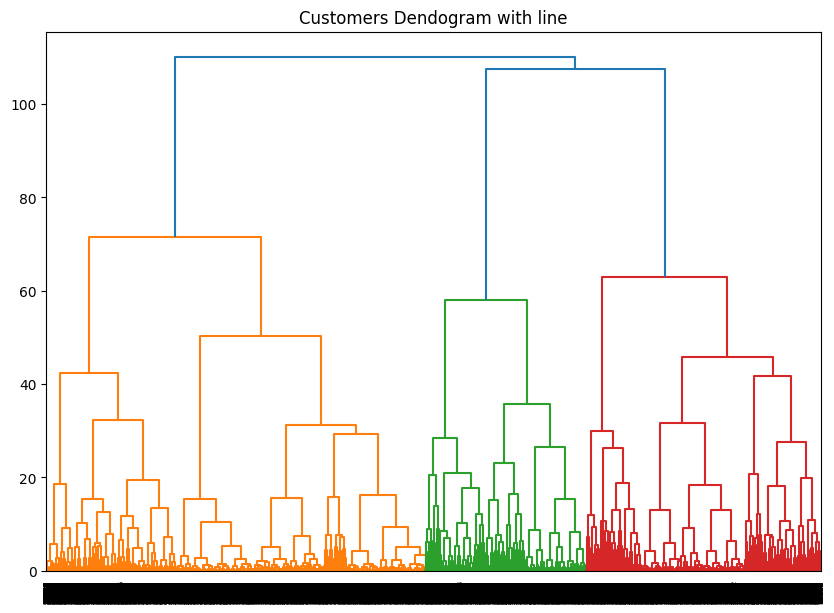

In [127]:
# Cutting to height 3

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customers Dendogram with line")
clusters = shc.linkage(X_norm, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)

Error in callback <function _draw_all_if_interactive at 0x0000024B1B8ACCA0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

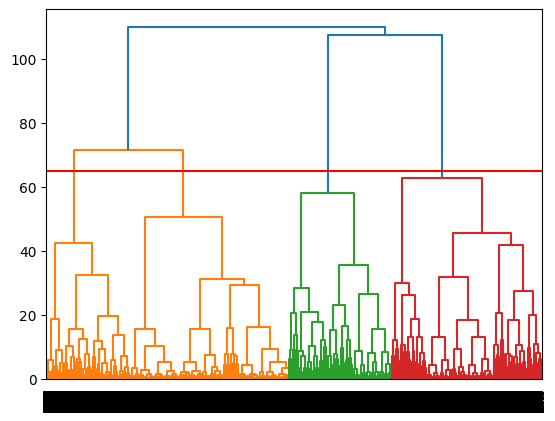

In [129]:
plt.figure(figsize=(10, 7))
plt.title("Cardio pacients Dendogram with line")
shc.dendrogram(clusters)
plt.axhline(y = 65, color = 'r', linestyle = '-')

In [132]:
# Assigning labels to cases and 6 clusters

from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
clustering_model.fit(X_norm)
len(clustering_model.labels_)

34979

In [133]:
len(clustering_model.labels_)

34979

In [134]:
# number of cases per cluster

import collections

print(collections.Counter(clustering_model.labels_))

Counter({1: 11208, 0: 10569, 2: 7271, 3: 5931})


In [136]:
cluster_data = clustering_model.labels_
data_train['cluster'] = cluster_data
#de los 3 clusters creados, quiero saber 

In [137]:
data_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,overweight,cluster
id,,,,,,,,,,,,,,
1,20228,1,156,85.0,140,90,3,1,0,0,1,34.93,2,3
2,18857,1,165,64.0,130,70,3,1,0,0,0,23.51,0,2
3,17623,2,169,82.0,150,100,1,1,0,0,1,28.71,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,29.98,1,0
24,16782,2,172,112.0,120,80,1,1,0,0,0,37.86,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,19699,1,172,70.0,130,90,1,1,0,0,1,23.66,0,1
99992,21074,1,165,80.0,150,80,1,1,0,0,1,29.38,1,1
99995,22601,1,158,126.0,140,90,2,2,0,0,1,50.47,2,3


<Axes: xlabel='cluster'>

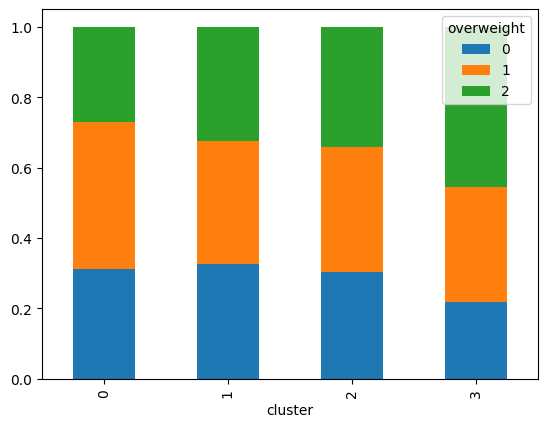

In [140]:
#agrupo por cluster y calculo numero con overweight=1 y overweight 2 y overweight=0. Quiero plot mis resultados en grafico de barras

data_train.groupby('cluster')['overweight'].value_counts()
#mostrar % de personas con overweight=0, overweight=1 y overweight=2 por cluster
data_train.groupby('cluster')['overweight'].value_counts(normalize=True).unstack()
#plot data_train.groupby('cluster')['overweight'].value_counts(normalize=True).unstack()
data_train.groupby('cluster')['overweight'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
#plot data_train.groupby('cluster')['overweight'].value_counts() en bar graph
#data_train.groupby('cluster')['overweight'].value_counts().unstack().plot(kind='bar', stacked=True)



In [153]:
#agrupo por cluster y calculo valor medio de age, ap_hi, ap_lo
data_train['age_years'] = data_train['age']/365
data_train.groupby('cluster')[['age_years', 'ap_hi', 'ap_lo']].mean()
#dividir la variable 'age' entre 365
#plot data_train.groupby('cluster')[['age', 'ap_hi', 'ap_lo']].mean() en bar graph



,age_years,ap_hi,ap_lo
cluster,,,
0,54.534489,139.824108,115.169742
1,54.861455,134.974483,108.251160
2,55.030573,135.145372,101.618622
3,55.760006,139.319339,108.610858


In [156]:
#agrupo por cluster y calculo valor medio de age, ap_hi, ap_lo
data_train['age_years'] = data_train['age']/365
data_train.groupby('cluster')[['age_years']].mean()
#dividir la variable 'age' entre 365

,age_years
cluster,
0,54.534489
1,54.861455
2,55.030573
3,55.760006


In [173]:
df=data_train.groupby('cluster')[['ap_hi', 'ap_lo']].mean()
#añadir columna de ap_hi - ap_lo
df['ap_diff'] = df['ap_hi'] - df['ap_lo']
df


,ap_hi,ap_lo,ap_diff
cluster,,,
0,139.824108,115.169742,24.654367
1,134.974483,108.251160,26.723323
2,135.145372,101.618622,33.526750
3,139.319339,108.610858,30.708481


Text(0.5, 1.0, 'Presión arterial máxima y mínima por cluster')

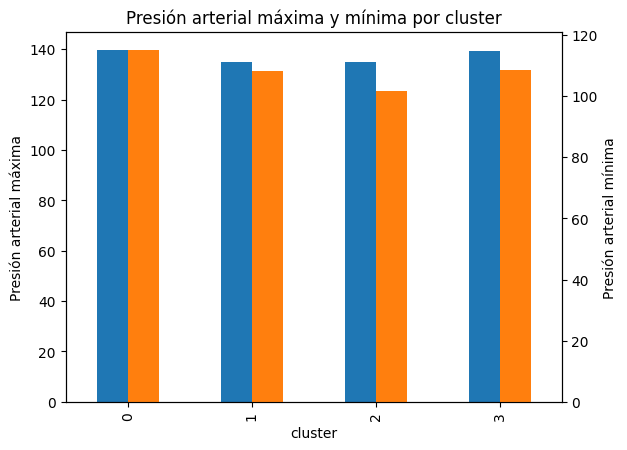

In [171]:
# Agrupar y calcular la media de las columnas 'ap_hi' y 'ap_lo' por cluster
cluster_means = data_train.groupby('cluster')[['ap_hi', 'ap_lo']].mean()

# Crear el gráfico de barras
ax = cluster_means.plot(kind='bar', secondary_y=['ap_lo'], legend=None)

# Ajustar las etiquetas de los ejes y el título
ax.set_ylabel('Presión arterial máxima')  # Establecer la etiqueta del eje Y primario
ax.right_ax.set_ylabel('Presión arterial mínima')  # Establecer la etiqueta del eje Y secundario
ax.set_title('Presión arterial máxima y mínima por cluster')  # Establecer el título del gráfico


<Axes: title={'center': 'Niveles de colesterol en sangre por cluster'}, xlabel='cluster'>

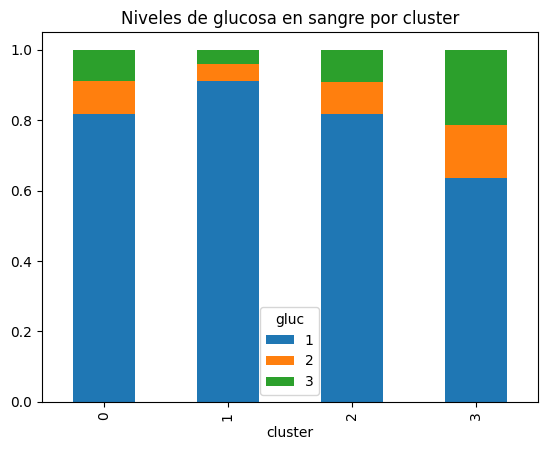

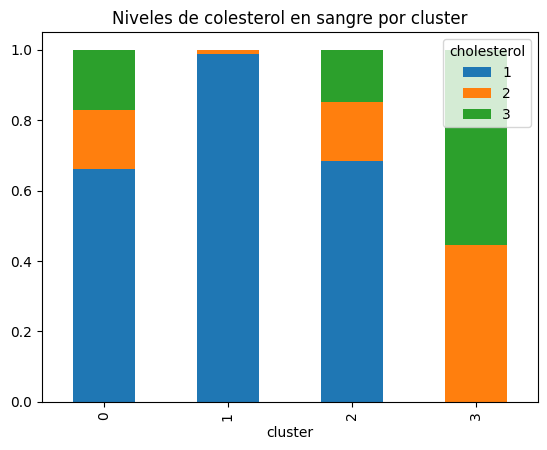

In [181]:
data_train.groupby('cluster')[['gluc']].value_counts()
#mostrar % de personas con overweight=0, overweight=1 y overweight=2 por cluster
df_gluc=data_train.groupby('cluster')['gluc'].value_counts(normalize=True).unstack()
df_chol=data_train.groupby('cluster')['cholesterol'].value_counts(normalize=True).unstack()

#plot df_gluc y df_chol en mismo bar graph
df_gluc.plot(kind='bar', stacked=True, title='Niveles de glucosa en sangre por cluster')
df_chol.plot(kind='bar', stacked=True, title='Niveles de colesterol en sangre por cluster')


In [185]:
data_train['gender']=data_train['gender'].apply(lambda x: 1 if x == 1 else 0) #1 si es hombre, 0 si es mujer
df_gender=data_train.groupby('cluster')['gender'].value_counts(normalize=True).unstack()
df_smoke=data_train.groupby('cluster')['smoke'].value_counts(normalize=True).unstack()
df_alco=data_train.groupby('cluster')['alco'].value_counts(normalize=True).unstack()
df_active=data_train.groupby('cluster')['active'].value_counts(normalize=True).unstack()




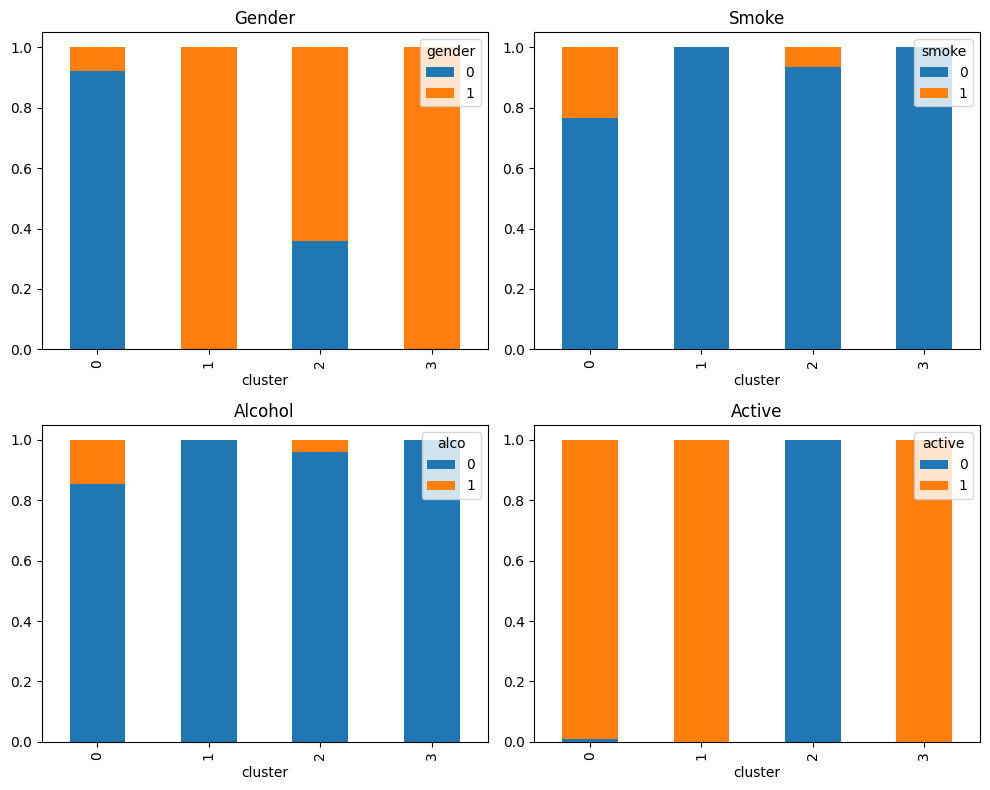

In [186]:
import matplotlib.pyplot as plt

# Crear subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de barras para df_gender
df_gender.plot(kind='bar', stacked=True, ax=axs[0, 0])
axs[0, 0].set_title('Gender')

# Gráfico de barras para df_smoke
df_smoke.plot(kind='bar', stacked=True, ax=axs[0, 1])
axs[0, 1].set_title('Smoke')

# Gráfico de barras para df_alco
df_alco.plot(kind='bar', stacked=True, ax=axs[1, 0])
axs[1, 0].set_title('Alcohol')

# Gráfico de barras para df_active
df_active.plot(kind='bar', stacked=True, ax=axs[1, 1])
axs[1, 1].set_title('Active')

# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar gráfico
plt.show()


## 3) MLP

In [3]:
raw_data = pd.read_csv('cardio_train.csv', sep=';')
#quiero que se indexe raw_data por id
raw_data.set_index('id', inplace=True)
raw_data=raw_data.dropna()
num_rows = raw_data.shape[0]
raw_data['bmi'] = (raw_data['weight'] / (((raw_data['height']/100)**2))).round(decimals=2)   # Body mass index
raw_data['age_years'] = (raw_data['age']/365).round(decimals=2)                               # Age in years

#creando variable overweight
#0 si el bmi es menor que 25, 1 si es mayor o igual que 25 y menor que 30, 2 si es mayor o igual que 30
raw_data['overweight'] = raw_data['bmi'].apply(lambda x: 0 if x < 25 else 1 if x < 30 else 2)
raw_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years,overweight
id,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50.39,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55.42,2
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,51.66,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48.28,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,47.87,0


In [4]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
 12  bmi          70000 non-null  float64
 13  age_years    70000 non-null  float64
 14  overweight   70000 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 8.5 MB


In [5]:
# Normalization and new df
scaler = MinMaxScaler()
scaler.fit(raw_data)
data= scaler.transform(raw_data)
data

array([[0.58807588, 1.        , 0.57948718, ..., 0.06266938, 0.58801921,
        0.        ],
       [0.73015873, 0.        , 0.51794872, ..., 0.10657182, 0.73014976,
        1.        ],
       [0.6240031 , 0.        , 0.56410256, ..., 0.06788618, 0.62390506,
        0.        ],
       ...,
       [0.64018583, 1.        , 0.65641026, ..., 0.09444444, 0.64029387,
        1.        ],
       [0.90073558, 0.        , 0.55384615, ..., 0.08004743, 0.90053687,
        0.5       ],
       [0.75431669, 0.        , 0.58974359, ..., 0.07262873, 0.75416784,
        0.        ]])

In [6]:
df=pd.DataFrame(data, columns=raw_data.columns)

In [7]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years,overweight
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0,0.0,0.062669,0.588019,0.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0,1.0,0.106572,0.730150,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0,1.0,0.067886,0.623905,0.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0,1.0,0.085501,0.528398,0.5
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0,0.0,0.066192,0.516813,0.0


In [8]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = "cardio"),
                                        df['cardio'],
                                        random_state = 123,
                                        shuffle      = True
                                    )

In [9]:
# Checking training and test datasets

print("Training dataset")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
#display(X_train.describe(include = 'object'))
print(" ")

print("Test dataset")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
#display(X_test.describe(include = 'object'))

Training dataset
-----------------------


count    52500.000000
mean         0.500533
std          0.500004
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: cardio, dtype: float64

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,age_years,overweight
count,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000,52500.000000
mean,0.671807,0.349181,0.560738,0.337968,0.017229,0.015065,0.184581,0.114029,0.089048,0.054210,0.802400,0.081638,0.671785,0.444695
std,0.190570,0.476716,0.042344,0.075895,0.008822,0.017640,0.340928,0.287359,0.284815,0.226433,0.398192,0.020824,0.190536,0.396601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.532559,0.000000,0.533333,0.289474,0.016698,0.013550,0.000000,0.000000,0.000000,0.000000,1.000000,0.069140,0.532636,0.000000
50%,0.689663,0.000000,0.564103,0.326316,0.016698,0.013550,0.000000,0.000000,0.000000,0.000000,1.000000,0.077676,0.689743,0.500000
75%,0.815254,1.000000,0.589744,0.378947,0.017934,0.014453,0.500000,0.000000,0.000000,0.000000,1.000000,0.090888,0.815202,1.000000
max,0.999071,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.930386,0.998870,1.000000


 
Test dataset
-----------------------


count    17500.000000
mean         0.497200
std          0.500006
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cardio, dtype: float64

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,age_years,overweight
count,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000,17500.000000
mean,0.670096,0.350743,0.561052,0.337794,0.017283,0.015015,0.180000,0.110829,0.085371,0.052457,0.807714,0.081461,0.670075,0.443771
std,0.192432,0.477216,0.041372,0.075383,0.011375,0.015033,0.337691,0.282426,0.279442,0.222953,0.394108,0.020056,0.192396,0.395173
min,0.270151,0.000000,0.076923,0.100000,0.001855,0.006323,0.000000,0.000000,0.000000,0.000000,0.000000,0.021850,0.270133,0.000000
25%,0.529384,0.000000,0.533333,0.289474,0.016698,0.013550,0.000000,0.000000,0.000000,0.000000,1.000000,0.069140,0.529528,0.000000
50%,0.688889,0.000000,0.564103,0.326316,0.016698,0.013550,0.000000,0.000000,0.000000,0.000000,1.000000,0.077507,0.688895,0.500000
75%,0.815099,1.000000,0.589744,0.378947,0.017934,0.014453,0.000000,0.000000,0.000000,0.000000,1.000000,0.090278,0.814919,1.000000
max,1.000000,1.000000,0.733333,0.842105,0.876314,0.909666,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
from sklearn.model_selection import GridSearchCV

# Hiperparámetros a probar
parameter_space = {
    'hidden_layer_sizes': [(i, j) for i in range(10, 90, 20) for j in range(10, 90, 20)],
    'alpha': [0.0001, 0.05],
    'learning_rate_init': [0.001, 0.01],
    'solver': ['sgd', 'adam'],
}

mlp = MLPClassifier(activation="relu", random_state=1, max_iter=5000, tol=0.001, n_iter_no_change=3, verbose=True)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Mejores parámetros encontrados
print('Best parameters found:\n', clf.best_params_)

# Mejor modelo
best_mlp = clf.best_estimator_

# Evaluar en el conjunto de prueba
Y_pred_test = best_mlp.predict(X_test)
acc_score = accuracy_score(y_test, Y_pred_test)
print('Accuracy on test set:', round(acc_score, 4))

# Otras métricas
print(classification_report(y_test, Y_pred_test))



Iteration 1, loss = 0.63732554
Iteration 2, loss = 0.62966072
Iteration 3, loss = 0.62826080
Iteration 4, loss = 0.62702309
Iteration 5, loss = 0.62573191
Iteration 6, loss = 0.62571503
Iteration 7, loss = 0.62413065
Iteration 8, loss = 0.62407023
Iteration 9, loss = 0.62304310
Iteration 10, loss = 0.62183793
Iteration 11, loss = 0.62138158
Iteration 12, loss = 0.61972698
Iteration 13, loss = 0.61855492
Iteration 14, loss = 0.61677258
Iteration 15, loss = 0.61506629
Iteration 16, loss = 0.61495132
Iteration 17, loss = 0.60955046
Iteration 18, loss = 0.60713544
Iteration 19, loss = 0.60177268
Iteration 20, loss = 0.60091429
Iteration 21, loss = 0.59757489
Iteration 22, loss = 0.59605983
Iteration 23, loss = 0.58675029
Iteration 24, loss = 0.58342033
Iteration 25, loss = 0.58186588
Iteration 26, loss = 0.58336052
Iteration 27, loss = 0.58091673
Iteration 28, loss = 0.57709528
Iteration 29, loss = 0.57524301
Iteration 30, loss = 0.57499713
Iteration 31, loss = 0.57951958
Iteration 32, los

In [22]:
# Mejores parámetros encontrados
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'alpha': 0.0001, 'hidden_layer_sizes': (30, 10), 'learning_rate_init': 0.01, 'solver': 'adam'}


In [23]:
# Mejor modelo
best_mlp = clf.best_estimator_

# Evaluar en el conjunto de prueba
Y_pred_test = best_mlp.predict(X_test)
acc_score = accuracy_score(y_test, Y_pred_test)
print('Accuracy on test set:', round(acc_score, 4))

# Otras métricas
print(classification_report(y_test, Y_pred_test))

Accuracy on test set: 0.7029
              precision    recall  f1-score   support

         0.0       0.76      0.60      0.67      8799
         1.0       0.67      0.81      0.73      8701

    accuracy                           0.70     17500
   macro avg       0.71      0.70      0.70     17500
weighted avg       0.71      0.70      0.70     17500



In [24]:
# Recolectar la precisión en el conjunto de entrenamiento
Y_pred_train = best_mlp.predict(X_train)
train_acc_score = accuracy_score(y_train, Y_pred_train)

# Recolectar la precisión en el conjunto de prueba
test_acc_score = accuracy_score(y_test, Y_pred_test)

# Recolectar las probabilidades de predicción para la curva ROC
Y_probs = best_mlp.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, Y_probs)
roc_auc = auc(fpr, tpr)

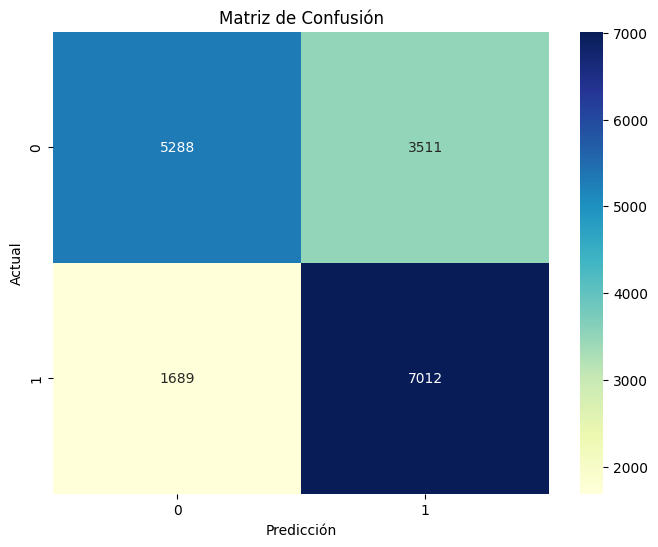

In [25]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, Y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Matriz de Confusión')
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.show()

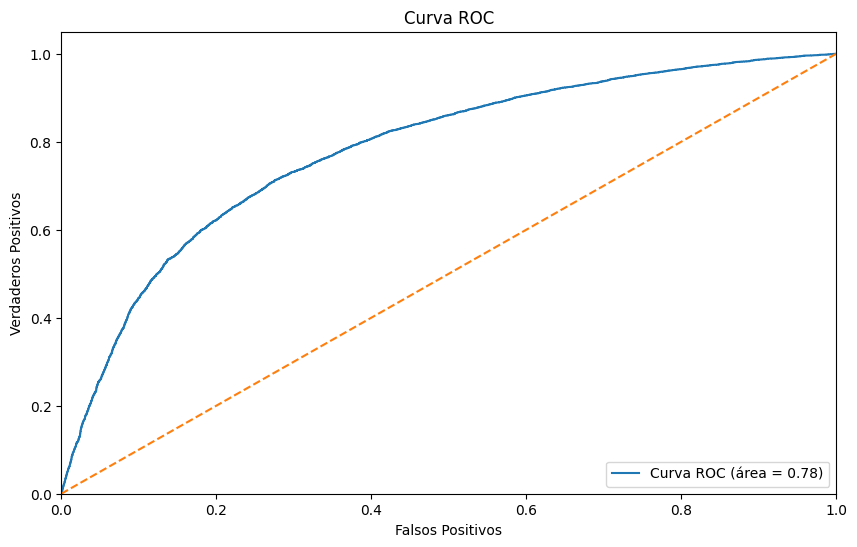

In [26]:
# Curva ROC y AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

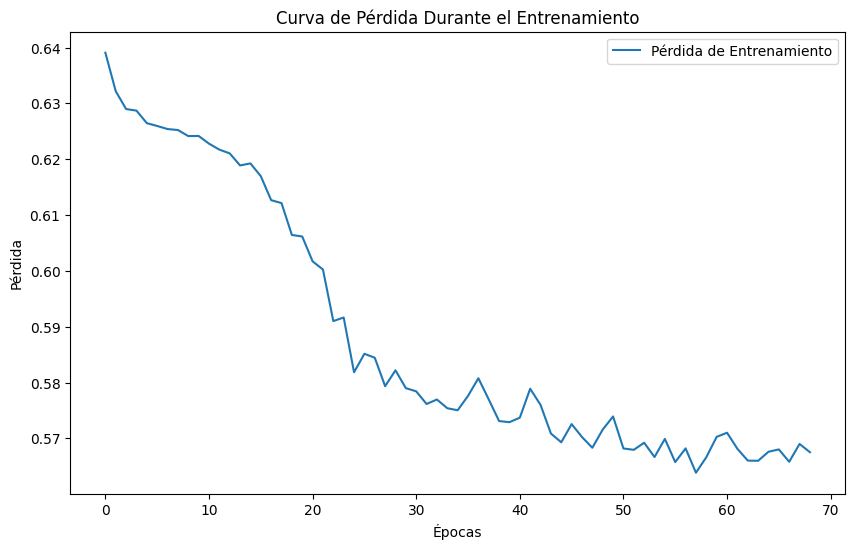

In [27]:
# Entrenar el mejor modelo fuera de GridSearchCV
best_params = clf.best_params_
best_mlp = MLPClassifier(**best_params)
best_mlp.fit(X_train, y_train)

# Curva de Pérdida Durante el Entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(best_mlp.loss_curve_, label='Pérdida de Entrenamiento')
plt.title('Curva de Pérdida Durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [28]:
from sklearn.neural_network import MLPClassifier
# Multi MLP Generator
training_accuracy = []
testing_accuracy = []
Layer1 = range(10,90,20)
Layer2 = range(10,90,20)
LayersComb = len(Layer1)*len(Layer2)
Step=0
score=0

for i in Layer1 :
  for j in Layer2 :
    mlp = MLPClassifier(hidden_layer_sizes=(i,j),activation="relu" ,random_state=1, max_iter=5000, tol=0.001, n_iter_no_change=3, verbose=True)
    mlp.fit(X_train, y_train)
    Y_pred_train = mlp.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, Y_pred_train))
    Y_pred_test = mlp.predict(X_test)
    acc_score = accuracy_score(y_test,Y_pred_test)
    testing_accuracy.append(acc_score)
    Step = Step + 1
    if score < acc_score:
        score = acc_score
        best_Layer1 = i
        best_Layer2 = j
        best_Step = Step
    
    print('Step ', Step, ' of ', LayersComb, ' Layer1: ', i, ' Layer2: ', j)    
    print('Best Accuracy Score', round(score, 4), ' Best Layer1: ', best_Layer1, ' Best Layer2: ', best_Layer2, ' do Step:', best_Step)

Iteration 1, loss = 0.67126446
Iteration 2, loss = 0.63875585
Iteration 3, loss = 0.63368450
Iteration 4, loss = 0.63224673
Iteration 5, loss = 0.63119308
Iteration 6, loss = 0.63010322
Iteration 7, loss = 0.62948565
Iteration 8, loss = 0.62900058
Iteration 9, loss = 0.62846861
Iteration 10, loss = 0.62784281
Training loss did not improve more than tol=0.001000 for 3 consecutive epochs. Stopping.
Step  1  of  16  Layer1:  10  Layer2:  10
Best Accuracy Score 0.6487  Best Layer1:  10  Best Layer2:  10  do Step: 1
Iteration 1, loss = 0.67518102
Iteration 2, loss = 0.64014531
Iteration 3, loss = 0.63382309
Iteration 4, loss = 0.63224962
Iteration 5, loss = 0.63157617
Iteration 6, loss = 0.63098409
Iteration 7, loss = 0.62962094
Iteration 8, loss = 0.62890527
Iteration 9, loss = 0.62818780
Iteration 10, loss = 0.62784146
Iteration 11, loss = 0.62718198
Training loss did not improve more than tol=0.001000 for 3 consecutive epochs. Stopping.
Step  2  of  16  Layer1:  10  Layer2:  30
Best Accu

In [31]:
print(f"Después de probar {LayersComb} combinaciones, los mejores hiperparámetros encontrados son:")
print(f"Mejor número de neuronas en la primera capa oculta: {best_Layer1}")
print(f"Mejor número de neuronas en la segunda capa oculta: {best_Layer2}")
print(f"La mayor precisión de prueba alcanzada: {round(score, 4)} en el paso {best_Step}")


Después de probar 16 combinaciones, los mejores hiperparámetros encontrados son:
Mejor número de neuronas en la primera capa oculta: 70
Mejor número de neuronas en la segunda capa oculta: 30
La mayor precisión de prueba alcanzada: 0.6571 en el paso 14


<Axes: >

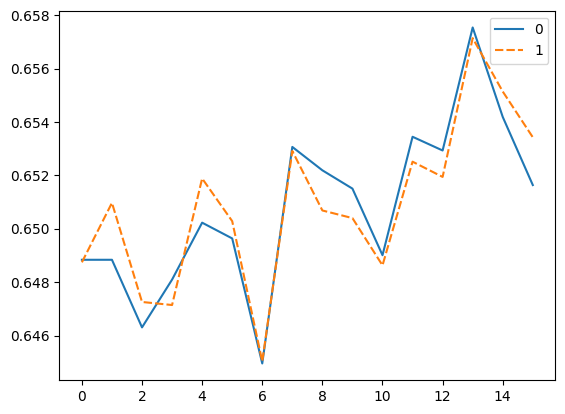

In [29]:
sns.lineplot(data=[training_accuracy,testing_accuracy])

In [30]:
# Selected Model
mlp_selected = MLPClassifier(hidden_layer_sizes=(50,30),random_state=1, max_iter=500, tol=0.001, n_iter_no_change=3, verbose=True)
mlp_selected.fit(X_train, y_train)

Iteration 1, loss = 0.64626510
Iteration 2, loss = 0.63320017
Iteration 3, loss = 0.63148882
Iteration 4, loss = 0.62976780
Iteration 5, loss = 0.62926892
Iteration 6, loss = 0.62794538
Iteration 7, loss = 0.62718263
Iteration 8, loss = 0.62689159
Iteration 9, loss = 0.62627675
Iteration 10, loss = 0.62528598
Training loss did not improve more than tol=0.001000 for 3 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, n_iter_no_change=3,
              random_state=1, tol=0.001, verbose=True)

In [13]:
Y_pred_train = mlp_selected.predict(X_train)
training_accuracy.append(accuracy_score(y_train, Y_pred_train))
Y_pred_test = mlp_selected.predict(X_test)
acc_score = accuracy_score(y_test,Y_pred_test)
testing_accuracy.append(acc_score)

<Axes: >

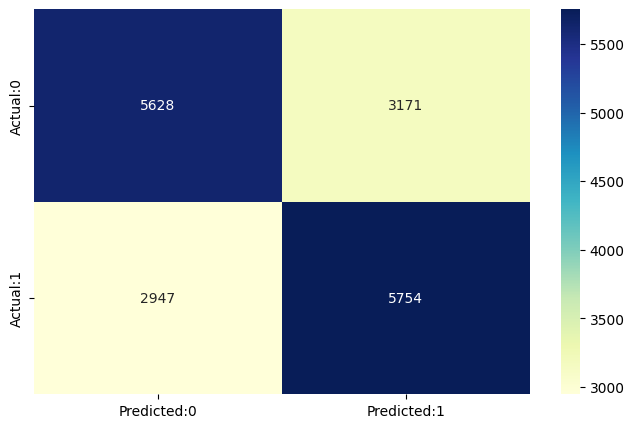

In [14]:
# Confusion Matrix for Selected Model
cm=confusion_matrix(y_test,Y_pred_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

         0.0       0.66      0.64      0.65      8799
         1.0       0.64      0.66      0.65      8701

    accuracy                           0.65     17500
   macro avg       0.65      0.65      0.65     17500
weighted avg       0.65      0.65      0.65     17500

